# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Import data

In [5]:
drive = "D"
date = "20240511"
mdl = "rfr"
#mdl = "gbr"
#mdl = "abr"

In [6]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [7]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [8]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [9]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [10]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
#df2 = df1.copy()

(188, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

(188, 297)

In [11]:
# Check for null values in each column
columns_with_nulls = df1.columns[df1.isnull().any()]
columns_with_nulls

## Fill missing values

In [13]:
# auv07.2012 missing b1_wfp_dry and b1_ccw_dry all variables filled with median
# b2_dp1fm_dry_min - about 20 missing values convert to 1 or 0
df1["b2_dbifm_dry_max"] = df1["b2_dbifm_dry_max"].fillna(1)
filled_df = df1.fillna(df1.median())

In [15]:
# Check for null values in each column
columns_with_nulls = filled_df.columns[filled_df.isnull().any()]
columns_with_nulls

Index([], dtype='object')

In [17]:
df = filled_df.rename(columns={'bio_agb_kg1ha': 'target'})

In [18]:
df

uid  site_clean      date  lon_gda94  lat_gda94  bio_l_kg1ha  \
0      1  agb02.2012  20120417     131.01     -12.65         0.00   
1      2  amg01.2012  20120619     134.05     -16.38       413.63   
2      3  amg03.2012  20120620     134.03     -16.78         0.00   
3      4  amg05.2012  20120621     134.09     -16.73       833.61   
4      5  amg06.2012  20120621     134.09     -16.69       104.28   
..   ...         ...       ...        ...        ...          ...   
183  184   wh07.2012  20120725     130.86     -17.73         8.12   
184  185   wh08.2012  20120725     130.86     -17.80         0.00   
185  186   wh09.2012  20120725     130.83     -17.85         0.00   
186  187   wh13.2012  20120726     130.98     -17.48         0.00   
187  188   wh15.2012  20120727     130.95     -17.57         0.00   

     bio_t_kg1ha  bio_b_kg1ha  bio_w_kg1ha  bio_br_kg1ha  ...  dbifmdry_NDGI  \
0           0.00         0.00         0.00          0.00  ...       -1538462   
1         448.55      1310.22      3748.31       2886.44  ...       -1341991   
2           0.00         0.00         0.00          0.00  ...       -2629287   
3         906.46      3541.75     11522.38       8737.57  ...       -1173184   
4         113.39       443.05      1441.38       1093.02  ...       -1255729   
..           ...          ...          ...           ...  ...            ...   
183         8.83        34.49       112.20         85.08  ...       -1751216   
184         0.00         0.00         0.00          0.00  ...       -1711085   
185         0.00         0.00         0.00          0.00  ...       -1939035   
186         0.00         0.00         0.00          0.00  ...       -1670989   
187         0.00         0.00         0.00          0.00  ...       -1938944   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
0        1538462       1964774        -383207        1409000         2022182   
1        1341991       2881356        -338983        1438000         2197130   
2        2629287       1429988       -1452928        1629000         1787156   
3        1173184       2241024        -539075        1088000         1753382   
4        1255729       2197205        -836979        1094000         1668140   
..           ...           ...            ...            ...             ...   
183      1751216       -653378       -1646321        1345000         1214483   
184      1711085        742810        -791061        1523000         1587738   
185      1939035       2065458        -545833        1776000         1952017   
186      1670989       1488840        -458342        1218000         1131930   
187      1938944       1487304        -952381        1398000         1389131   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
0         1205000        2336781        4405850       6047316  
1         1283000        2534571        4947937       7201101  
2         1146000        2030475        3306405       4099401  
3          983000        2111557        4957136       7222079  
4          957000        1997912        4379863       5995724  
..            ...            ...            ...           ...  
183        841000        1367776        1991475       2236580  
184       1080000        1777875        2626459       3085874  
185       1318000        2163493        3185114       3909535  
186        767000        1290232        1958131       2194196  
187        928000        1577873        2428048       2811428  

[188 rows x 297 columns]

In [19]:
columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls

Index([], dtype='object')

## Main only

In [ ]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [ ]:
# #main major and h99 
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major", "h99"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [ ]:
# df.columns

In [ ]:
df2 = df[['site_clean', "target",

'b6_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b2_dbifm_dry_mean',
 'dbifmdry_GNDVI',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NBR',
 'b5_dbifm_dry_mean',
 'dbifmdry_NDVI',
 'b1_hsd_mean',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'rh_tmin_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_GSAVI']]

var_ = "20_ada"

In [ ]:
df2 = df[['site_clean', "target",

'b6_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b2_dbifm_dry_mean',
 'dbifmdry_GNDVI',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NBR',
 'b5_dbifm_dry_mean',
 'dbifmdry_NDVI',
 'b1_hsd_mean',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'rh_tmin_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_GSAVI','fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10']]
var_ = "20_ada_fire"

In [ ]:
df2

In [20]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
 'burnt_enco', 
 'fire_sn_ord', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
 'tot_an_emsi_avg_si', 
 'tot_an_drsi_avg_si', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
 'b1_wfp_dry_mean', 
 'b1_wfp_dry_p50', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
 'b1_n17_dry_major', 
 'b1_hsd_mean', 
 'b1_hsd_p50', 
 'b1_hsd_p99', 
 'b1_hmc_mean', 
 'b1_hmc_p50', 
 'b1_hmc_p99', 
 'b1_hcv_mean', 
 'b1_hcv_p50', 
 'b1_hcv_p99', 
 'b1_h99_mean', 
 'b1_h99_p50', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
 'b1_ccw_dry_mean', 
 'b1_ccw_dry_p50', 
 'b1_ccw_dry_p99', 
 'b1_dbifm_dry_mean', 
 'b1_dp1fm_dry_mean', 
 'b1_dp1fm_dry_p50',
 'b1_dp1fm_dry_p99', 
 'b2_dp1fm_dry_mean', 
 'b2_dp1fm_dry_p50', 
 'b2_dp1fm_dry_p95', 
 'b3_dp1fm_dry_mean', 
 'b3_dp1fm_dry_p50', 
 'b3_dp1fm_dry_p99',  
 'b1_dbifm_dry_p50', 
 'b1_dbifm_dry_p99', 
 'b2_dbifm_dry_mean', 
 'b2_dbifm_dry_p50',  
 'b2_dbifm_dry_p99', 
 'b3_dbifm_dry_mean', 
 'b3_dbifm_dry_p50',  
 'b3_dbifm_dry_p99', 
 'b4_dbifm_dry_mean', 
 'b4_dbifm_dry_p50',  
 'b4_dbifm_dry_p99', 
 'b5_dbifm_dry_mean', 
 'b5_dbifm_dry_p50', 
 'b5_dbifm_dry_p99', 
 'b6_dbifm_dry_mean', 
 'b6_dbifm_dry_p50',
 'b6_dbifm_dry_p99',
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

var_ = "mm_si_f"

### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [ ]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
#  'rain_d_mean', 
#  'et_ma_mean', 
#  'tmax_mean', 
#  'tmin_mean', 
#  'rh_tmax_mean', 
#  'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',

 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

var_ = "mm_si_f"

## Main and Major Only

In [ ]:
# #main and major only
# var_ = "mean_major"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]


In [ ]:
# #varibles no coorolation
# df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean','rh_tmin_mean'], axis=1)
# df2.columns
# var_ = "mean_major_met_rem"

In [21]:
df2.shape

(188, 107)

In [23]:
columns_with_nulls = df2.columns[df2.isnull().any()]
columns_with_nulls

Index([], dtype='object')

## Main and veg indicies

In [ ]:
# var_ = "mm_met_rem"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'major', 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  #'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  #'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR']
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

# del df2['fire_mean']
# del df2['rh_tmin_mean']

# #varibles no coorolation
# df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
# print(list(df2.columns))
 

## Main, veg indicies and fire

In [ ]:
# var_ = "mmf_met_rem"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
# 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

# #varibles no coorolation
# df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
# print(list(df2.columns))
# #d_type = "mmf_met_rem"

## Remove all target == 0 values

In [ ]:
df2 = df2[df2['target']>0.0]
df2.shape

## Remove site values which seem like outliers

In [24]:
#Dry Fire

#WFP
'''ant03.2012
site12.2023 # lat long error - should be correted
ntagfu0038.2012 # not too bad

'''

# Drop rows where sites seem to be outliers
df3 = df2[df2['site_clean'] != 'ant03.2012']
df4 = df3[df3['site_clean'] != 'site12.2023']
df2 = df4[df4['site_clean'] != 'ntagfu0038.2012']
df2


"""#b1 dbifm
nc02.2013
ntamgd0001.2014
nc02.2013

#b2 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b3 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b4 dbifm
Noisy

#b5 dbifm
reasonable

#b2 dp1
looks pritty reasonable

#b3 dp1
Noisy <1200

#b6 dbifm
wh07.2012
reasonable

#h99

ntastu0003.2016
nttdab0001.2014
ntagfu0035.2012
ntagfu0034.2012

#hcv
site10.2023
site16.2023
site23.2023
girra02.2012
vrd37.2012
ntagfu0034.2012
ntagfu0035.2012

#hmc
nttdab0001.2014
ntastu0003.2016

#n17
ntagfu0003.2012
wh02.2012
wh07.2012 >10
#many are class 1

#wfp looks pritty reasonable

#et ma mean
noisy
"""

'#b1 dbifm\nnc02.2013\nntamgd0001.2014\nnc02.2013\n\n#b2 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b3 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b4 dbifm\nNoisy\n\n#b5 dbifm\nreasonable\n\n#b2 dp1\nlooks pritty reasonable\n\n#b3 dp1\nNoisy <1200\n\n#b6 dbifm\nwh07.2012\nreasonable\n\n#h99\n\nntastu0003.2016\nnttdab0001.2014\nntagfu0035.2012\nntagfu0034.2012\n\n#hcv\nsite10.2023\nsite16.2023\nsite23.2023\ngirra02.2012\nvrd37.2012\nntagfu0034.2012\nntagfu0035.2012\n\n#hmc\nnttdab0001.2014\nntastu0003.2016\n\n#n17\nntagfu0003.2012\nwh02.2012\nwh07.2012 >10\n#many are class 1\n\n#wfp looks pritty reasonable\n\n#et ma mean\nnoisy\n'

## Drop AGB numbers which are low

In [25]:
df2 = df2[df2['target']>0.0]
#df2 = df2[df2['target']>1000.0]
df2.shape

(128, 107)

In [26]:
columns_with_nulls = df2.columns[df2.isnull().any()]
columns_with_nulls

Index([], dtype='object')

## Drop AGB numbers which are high

In [27]:
# drop the 7 tern sites that apear to be outliers
df2 =df2[df2['target'] <= 40000]
df2.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format('target')))
#df2 =df2[df2['target'] > 40000]
#df2.value_counts(['site_clean', value_x, value_y])

In [28]:
df2

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22          16        10        10      10.00   
3     amg05.2012 24670.80          20         5        10       9.75   
4     amg06.2012  3086.16          16         5         5       5.00   
5     amg08.2012 29521.80          16         0        10       4.38   
6     amg10.2012  2832.03          20         0         0       0.00   
..           ...      ...         ...       ...       ...        ...   
175   vrd37.2012 11596.20          16         0         0       0.00   
176  wedo01.2012  4370.91          20         0         7       4.55   
177  wedo03.2012 11338.13          16         0         0       0.00   
178    wh02.2012   240.24          20         9         9       9.00   
183    wh07.2012   240.24          20         0         0       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1         160      0.00     10.00          10  ...       -1341991   
3         195      1.09     10.00          10  ...       -1173184   
4          80      0.00      5.00           5  ...       -1255729   
5          70      4.96      0.00           0  ...         160256   
6           0      0.00      0.00           0  ...       -1649555   
..        ...       ...       ...         ...  ...            ...   
175         0      0.00      0.00           0  ...       -1823204   
176        91      3.34      7.00           7  ...       -1195335   
177         0      0.00      0.00           0  ...       -1640212   
178       180      0.00      9.00           9  ...       -1747930   
183         0      0.00      0.00           0  ...       -1751216   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1        1341991       2881356        -338983        1438000         2197130   
3        1173184       2241024        -539075        1088000         1753382   
4        1255729       2197205        -836979        1094000         1668140   
5        -160256       4296991        1027397        1132000         2118919   
6        1649555       1178145       -1367033        1354000         1841765   
..           ...           ...            ...            ...             ...   
175      1823204       2160229         416667        1533000         2086585   
176      1195335       2875595        -388226        1441000         2293214   
177      1640212       3674699         420811        1569000         2358574   
178      1747930       1255680        -310891        1456000         1648036   
183      1751216       -653378       -1646321        1345000         1214483   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1         1283000        2534571        4947937       7201101  
3          983000        2111557        4957136       7222079  
4          957000        1997912        4379863       5995724  
5         1142000        2535524        6503417      11725261  
6         1113000        2136276        3953819       5191686  
..            ...            ...            ...           ...  
175       1269000        2385039        4256961       5755877  
176       1318000        2646586        5336032       8133379  
177       1383000        2693107        5116537       7593904  
178       1076000        1870220        2964187       3574240  
183        841000        1367776        1991475       2236580  

[127 rows x 107 columns]

### Remove all outliers 3 std deviations above the mean

In [29]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        #print(mask)
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
        print(filtered_df.shape)
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_max
mean:  2.559055118110236
std_dev:  3.6245493278849468
threshold:  10.873647983654841
(127, 1)
____________________
column:  fire_mean
mean:  2.1020669291338585
std_dev:  3.203693043429205
threshold:  9.611079130287616
(127, 2)
____________________
column:  fire_sum
mean:  38.881889763779526
std_dev:  59.73959551747004
threshold:  179.21878655241014
(127, 3)
____________________
column:  fire_std
mean:  0.4977702330320258
std_dev:  1.1383196252769858
threshold:  3.4149588758309575
(127, 4)
____________________
column:  fire_med
mean:  2.106299212598425
std_dev:  3.431662747320689
threshold:  10.294988241962066
(127, 5)
____________________
column:  fire_major
mean:  2.094488188976378
std_dev:  3.4490234892823364
threshold:  10.34707046784701
(127, 6)
____________________
column:  fire_minor
mean:  1.811023622047244
std_dev:  3.2237518403265772
threshold:  9.67125552097973
(127, 7)
____________________
column:  burnt_enco
mean:  0.29133858267716534


In [30]:
ft_orig

site_clean   target  fire_count  fire_min
1     amg01.2012  8376.22          16        10
3     amg05.2012 24670.80          20         5
4     amg06.2012  3086.16          16         5
5     amg08.2012 29521.80          16         0
6     amg10.2012  2832.03          20         0
..           ...      ...         ...       ...
175   vrd37.2012 11596.20          16         0
176  wedo01.2012  4370.91          20         0
177  wedo03.2012 11338.13          16         0
178    wh02.2012   240.24          20         9
183    wh07.2012   240.24          20         0

[127 rows x 4 columns]

In [31]:
filtered_df

fire_max  fire_mean  fire_sum  fire_std  fire_med  fire_major  \
1          10      10.00       160      0.00     10.00          10   
3          10       9.75       195      1.09     10.00          10   
4           5       5.00        80      0.00      5.00           5   
5          10       4.38        70       nan      0.00           0   
6           0       0.00         0      0.00      0.00           0   
..        ...        ...       ...       ...       ...         ...   
175         0       0.00         0      0.00      0.00           0   
176         7       4.55        91      3.34      7.00           7   
177         0       0.00         0      0.00      0.00           0   
178         9       9.00       180      0.00      9.00           9   
183         0       0.00         0      0.00      0.00           0   

     fire_minor  burnt_enco  fire_sn_ord  fire_f  ...  dbifmdry_NDGI  \
1            10           1            2    0.44  ...    -1341991.00   
3             5           1            2    0.78  ...    -1173184.00   
4             5           1            1    0.34  ...    -1255729.00   
5            10           0            0    0.00  ...            nan   
6             0           0            0    0.62  ...    -1649555.00   
..          ...         ...          ...     ...  ...            ...   
175           0           0            0    0.00  ...    -1823204.00   
176           0           1            2    0.15  ...    -1195335.00   
177           0           0            0    0.17  ...    -1640212.00   
178           9           1            2    0.28  ...    -1747930.00   
183           0           0            0    1.55  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00       2881356        -338983        1438000         2197130   
3     1173184.00       2241024        -539075        1088000         1753382   
4     1255729.00       2197205        -836979        1094000         1668140   
5            nan       4296991        1027397        1132000         2118919   
6     1649555.00       1178145       -1367033        1354000         1841765   
..           ...           ...            ...            ...             ...   
175   1823204.00       2160229         416667        1533000         2086585   
176   1195335.00       2875595        -388226        1441000         2293214   
177   1640212.00       3674699         420811        1569000         2358574   
178   1747930.00       1255680        -310891        1456000         1648036   
183   1751216.00       -653378       -1646321        1345000         1214483   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1         1283000        2534571        4947937    7201101.00  
3          983000        2111557        4957136    7222079.00  
4          957000        1997912        4379863    5995724.00  
5         1142000        2535524        6503417   11725261.00  
6         1113000        2136276        3953819    5191686.00  
..            ...            ...            ...           ...  
175       1269000        2385039        4256961    5755877.00  
176       1318000        2646586        5336032    8133379.00  
177       1383000        2693107        5116537    7593904.00  
178       1076000        1870220        2964187    3574240.00  
183        841000        1367776        1991475    2236580.00  

[127 rows x 103 columns]

In [33]:
out_df

site_clean   target  fire_count  fire_min  fire_max  fire_mean  \
1     amg01.2012  8376.22          16        10        10      10.00   
3     amg05.2012 24670.80          20         5        10       9.75   
4     amg06.2012  3086.16          16         5         5       5.00   
5     amg08.2012 29521.80          16         0        10       4.38   
6     amg10.2012  2832.03          20         0         0       0.00   
..           ...      ...         ...       ...       ...        ...   
175   vrd37.2012 11596.20          16         0         0       0.00   
176  wedo01.2012  4370.91          20         0         7       4.55   
177  wedo03.2012 11338.13          16         0         0       0.00   
178    wh02.2012   240.24          20         9         9       9.00   
183    wh07.2012   240.24          20         0         0       0.00   

     fire_sum  fire_std  fire_med  fire_major  ...  dbifmdry_NDGI  \
1         160      0.00     10.00          10  ...    -1341991.00   
3         195      1.09     10.00          10  ...    -1173184.00   
4          80      0.00      5.00           5  ...    -1255729.00   
5          70       nan      0.00           0  ...            nan   
6           0      0.00      0.00           0  ...    -1649555.00   
..        ...       ...       ...         ...  ...            ...   
175         0      0.00      0.00           0  ...    -1823204.00   
176        91      3.34      7.00           7  ...    -1195335.00   
177         0      0.00      0.00           0  ...    -1640212.00   
178       180      0.00      9.00           9  ...    -1747930.00   
183         0      0.00      0.00           0  ...    -1751216.00   

     dbifmdry_RI  dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
1     1341991.00       2881356        -338983        1438000         2197130   
3     1173184.00       2241024        -539075        1088000         1753382   
4     1255729.00       2197205        -836979        1094000         1668140   
5            nan       4296991        1027397        1132000         2118919   
6     1649555.00       1178145       -1367033        1354000         1841765   
..           ...           ...            ...            ...             ...   
175   1823204.00       2160229         416667        1533000         2086585   
176   1195335.00       2875595        -388226        1441000         2293214   
177   1640212.00       3674699         420811        1569000         2358574   
178   1747930.00       1255680        -310891        1456000         1648036   
183   1751216.00       -653378       -1646321        1345000         1214483   

     dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1         1283000        2534571        4947937    7201101.00  
3          983000        2111557        4957136    7222079.00  
4          957000        1997912        4379863    5995724.00  
5         1142000        2535524        6503417   11725261.00  
6         1113000        2136276        3953819    5191686.00  
..            ...            ...            ...           ...  
175       1269000        2385039        4256961    5755877.00  
176       1318000        2646586        5336032    8133379.00  
177       1383000        2693107        5116537    7593904.00  
178       1076000        1870220        2964187    3574240.00  
183        841000        1367776        1991475    2236580.00  

[127 rows x 107 columns]

In [34]:
columns_with_nulls = out_df.columns[out_df.isnull().any()]
columns_with_nulls

Index(['fire_std', 'fire_pois1_5', 'fire_pois1_10', 'tot_avg_drse_djf',
       'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry',
       'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean',
       'b1_hcv_mean', 'b1_hcv_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_p99',
       'b2_dp1fm_dry_mean', 'b1_dbifm_dry_p50', 'b1_dbifm_dry_p99',
       'b2_dbifm_dry_mean', 'b2_dbifm_dry_p50', 'b2_dbifm_dry_p99',
       'b3_dbifm_dry_mean', 'b3_dbifm_dry_p50', 'b6_dbifm_dry_p99',
       'dbifmdry_r32', 'dbifmdry_r42', 'dbifmdry_r43', 'dbifmdry_r53',
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_MSR'],
      dtype='object')

In [ ]:
#out_df.dropna(inplace=True)

In [35]:
out_df.to_csv(r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire_drop_outliers.csv", index=False)

In [36]:
#fill outliers with median

filled_df = out_df.fillna(out_df.median())

In [37]:
df2 = filled_df #out_df
df2.shape

(127, 107)

In [38]:
#df2 = filtered_df

In [39]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [40]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [41]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=107)


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 183
Columns: 107 entries, site_clean to dbifmdry_MSR
dtypes: float64(78), int64(28), object(1)
memory usage: 107.2+ KB


In [43]:
df2.columns

Index(['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max',
       'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=107)

### Set variables to plot

In [44]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [45]:
value_y

'b1_wfp_mean'

In [46]:
df2.shape

(127, 107)

In [47]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [48]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [49]:
df2 = df2[df2['target']>0.0]
df2.shape

(127, 107)

In [52]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [53]:
print(column_list[3:])
print(column_list[1:2])

['fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 'b1_dp1fm_dry_p99', 'b2_dp1fm_dry_mean

## Choose which data set to run the models from

In [54]:
df_ml = df2

In [55]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 

In [56]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [57]:
print(list(df_ml))

['target', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'burnt_enco', 'fire_sn_ord', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'tot_an_emsi_avg_si', 'tot_an_drsi_avg_si', 'tot_avg_emse_djf', 'tot_avg_emse_mam', 'tot_avg_emse_jja', 'tot_avg_emse_son', 'tot_avg_emse_dry', 'tot_avg_emse_wet', 'tot_avg_emse_annual', 'tot_avg_drse_djf', 'tot_avg_drse_mam', 'tot_avg_drse_jja', 'tot_avg_drse_son', 'tot_avg_drse_dry', 'tot_avg_drse_wet', 'tot_avg_drse_annual', 'b1_wfp_dry_mean', 'b1_wfp_dry_p50', 'b1_wfp_dry_p99', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hsd_p50', 'b1_hsd_p99', 'b1_hmc_mean', 'b1_hmc_p50', 'b1_hmc_p99', 'b1_hcv_mean', 'b1_hcv_p50', 'b1_hcv_p99', 'b1_h99_mean', 'b1_h99_p50', 'b1_h99_p99', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_ccw_dry_p50', 'b1_ccw_dry_p99', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b1_dp1fm_dry_p50', 'b1_dp1fm_dry_

In [58]:
df_ml.shape

(127, 106)

In [59]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 183
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(78), int64(28)
memory usage: 106.2 KB


In [60]:
df_ml.head(5)

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
1  8376.22          16        10        10      10.00       160      0.00   
3 24670.80          20         5        10       9.75       195      1.09   
4  3086.16          16         5         5       5.00        80      0.00   
5 29521.80          16         0        10       4.38        70      0.00   
6  2832.03          20         0         0       0.00         0      0.00   

   fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
1     10.00          10          10  ...    -1341991.00   1341991.00   
3     10.00          10           5  ...    -1173184.00   1173184.00   
4      5.00           5           5  ...    -1255729.00   1255729.00   
5      0.00           0          10  ...    -1641968.50   1641968.50   
6      0.00           0           0  ...    -1649555.00   1649555.00   

   dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  dbifmdry_DVI  \
1       2881356        -338983        1438000         2197130       1283000   
3       2241024        -539075        1088000         1753382        983000   
4       2197205        -836979        1094000         1668140        957000   
5       4296991        1027397        1132000         2118919       1142000   
6       1178145       -1367033        1354000         1841765       1113000   

   dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
1        2534571        4947937    7201101.00  
3        2111557        4957136    7222079.00  
4        1997912        4379863    5995724.00  
5        2535524        6503417   11725261.00  
6        2136276        3953819    5191686.00  

[5 rows x 106 columns]

## Reduce level of 0 values

In [61]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
#no0_df = df_ml[df_ml['target']>=10.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [62]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(127, 106)

In [63]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 183
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(78), int64(28)
memory usage: 106.2 KB


In [64]:
test = df_ml[df_ml['target']>40000.0]

In [65]:
test.shape

(0, 106)

In [66]:
df_ml.dropna(inplace=True)

In [67]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 183
Columns: 106 entries, target to dbifmdry_MSR
dtypes: float64(78), int64(28)
memory usage: 106.2 KB


# Scatter plots with error

fire_count
fire_count
Regression
slope:  -1.3522314173202147e-05
intersept:  18.757570209322786
r2:  -0.039470633819926146
P_value:  0.6595133220352416
std error:  3.0618460527094396e-05


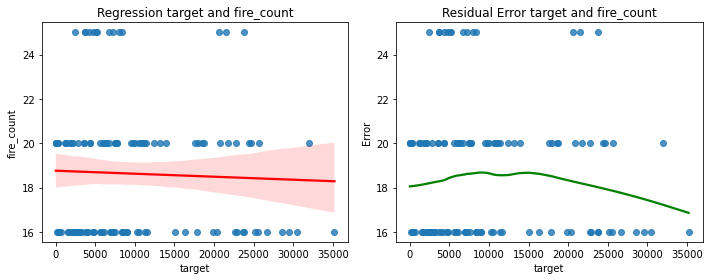

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_min
fire_min
Regression
slope:  -8.791718862371569e-06
intersept:  1.4137013845956972
r2:  -0.02616640153986632
P_value:  0.7702753212117212
std error:  3.0041807324693435e-05


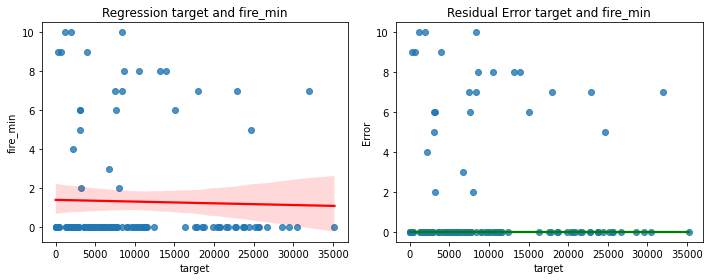

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_max
fire_max
Regression
slope:  2.7859763675109128e-05
intersept:  2.2960624439018673
r2:  0.06591694579287947
P_value:  0.46154646201870386
std error:  3.772070274342901e-05


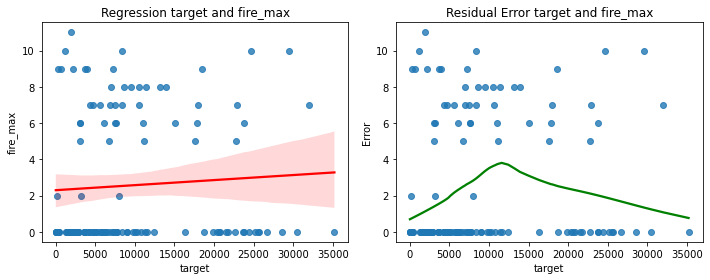

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_mean
fire_mean
Regression
slope:  2.0562153168302542e-05
intersept:  1.9079627826566439
r2:  0.05504163862737889
P_value:  0.5388050839984885
std error:  3.336286704975825e-05


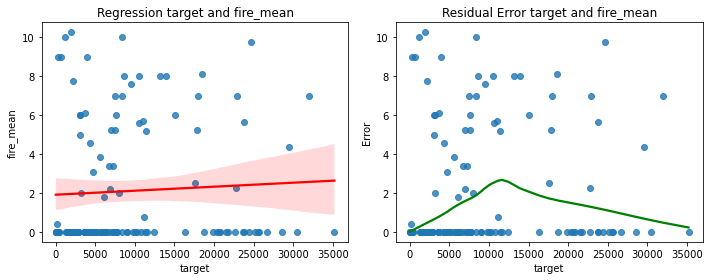

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_sum
fire_sum
Regression
slope:  0.0003655986051190734
intersept:  35.43068479419043
r2:  0.05248266928346039
P_value:  0.5578715897150077
std error:  0.0006222066752509692


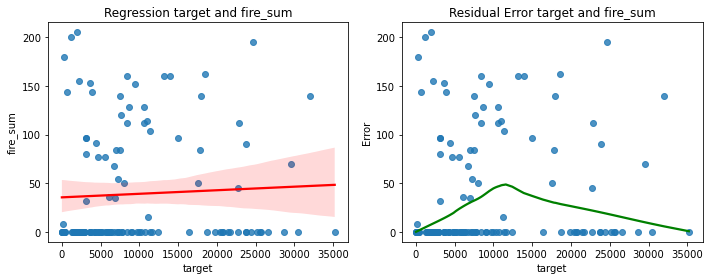

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_std
fire_std
Regression
slope:  4.579049309433739e-06
intersept:  0.3481180045157063
r2:  0.04127218932686968
P_value:  0.6450055424651918
std error:  9.914997385748038e-06


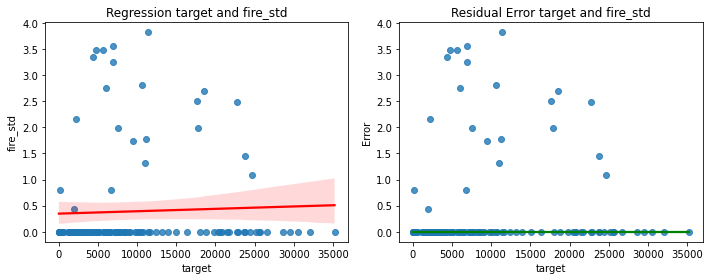

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_med
fire_med
Regression
slope:  9.389198668219828e-06
intersept:  2.0176663550040534
r2:  0.023463759104943405
P_value:  0.793441147941695
std error:  3.578131916638734e-05


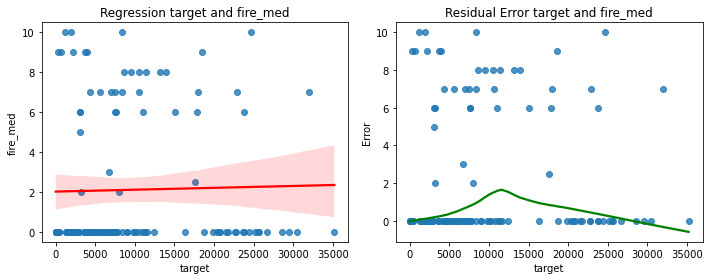

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_major
fire_major
Regression
slope:  6.919099608732049e-06
intersept:  2.029172756640522
r2:  0.017203907296741254
P_value:  0.8477614403953585
std error:  3.5966916204282405e-05


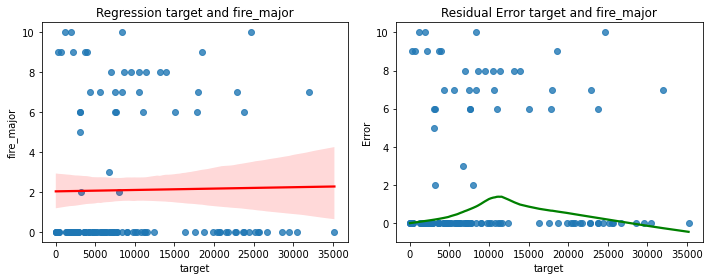

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_minor
fire_minor
Regression
slope:  5.863535967481316e-06
intersept:  1.755672578068985
r2:  0.01559809831536513
P_value:  0.8618228639288918
std error:  3.361863647717657e-05


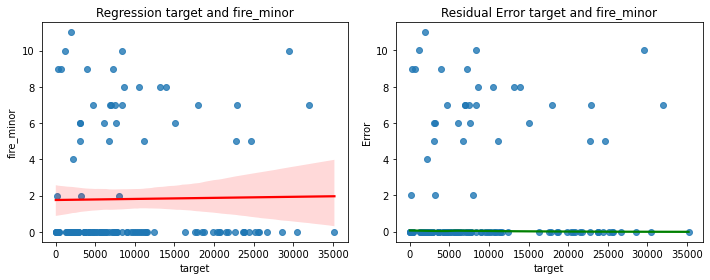

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
burnt_enco
burnt_enco
Regression
slope:  1.0360667122948846e-06
intersept:  0.28155824288310793
r2:  0.01947719443696325
P_value:  0.8279377760405892
std error:  4.756898901093787e-06


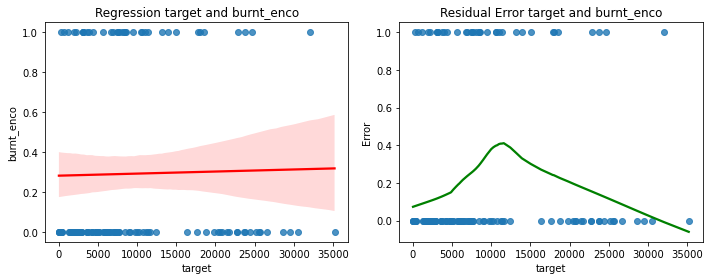

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_sn_ord
fire_sn_ord
Regression
slope:  2.41860773561984e-06
intersept:  0.4653576227573906
r2:  0.025752983928293113
P_value:  0.7738064180185414
std error:  8.397283409168937e-06


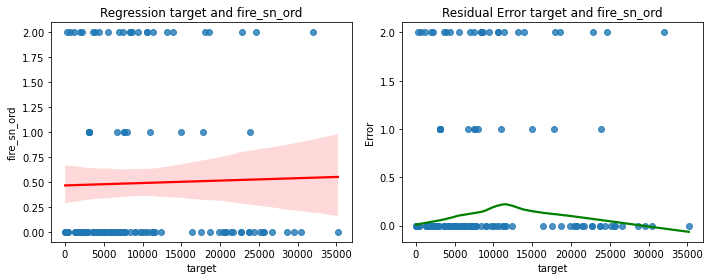

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_f
fire_f
Regression
slope:  -2.2914113824395775e-05
intersept:  0.9537917930984946
r2:  -0.21666022067378146
P_value:  0.014419874412929337
std error:  9.234824011810915e-06


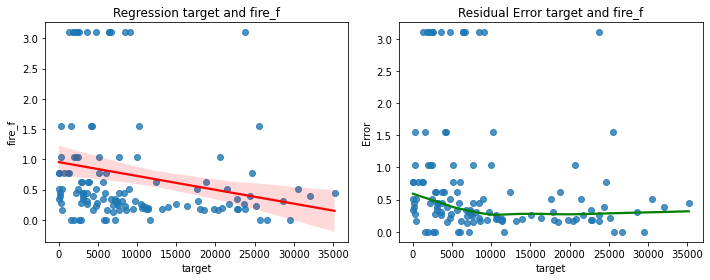

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_tot
fire_tot
Regression
slope:  0.0001610987563889454
intersept:  6.235153460628905
r2:  0.22797175909012016
P_value:  0.009944694606746504
std error:  6.154133514753807e-05


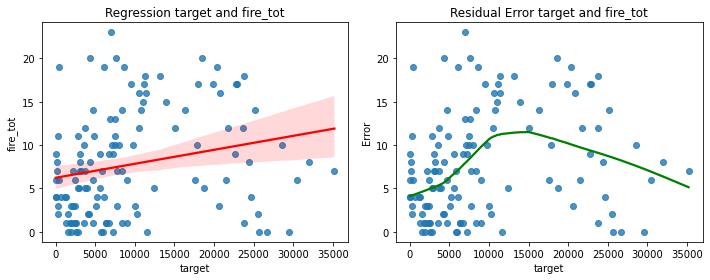

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
since_fire
since_fire
Regression
slope:  -4.839655418431418e-05
intersept:  6.826936140522817
r2:  -0.052186112100346606
P_value:  0.5601019815565726
std error:  8.283470089010258e-05


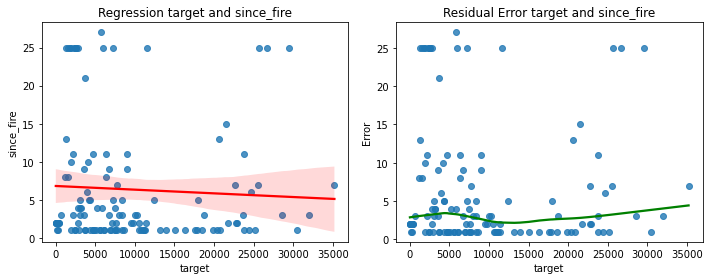

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_gap
fire_gap
Regression
slope:  -6.75698684699376e-05
intersept:  5.9318143366069584
r2:  -0.1325861437444467
P_value:  0.13728835280480697
std error:  4.518026016143816e-05


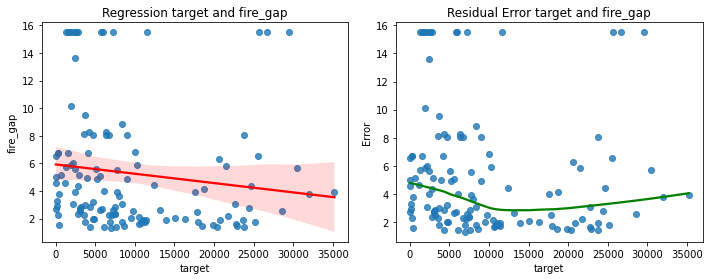

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_pois1_2
fire_pois1_2
Regression
slope:  0.0002137674349710146
intersept:  6.0784953009230716
r2:  0.24368384546690408
P_value:  0.005766511558391178
std error:  7.609681591283011e-05


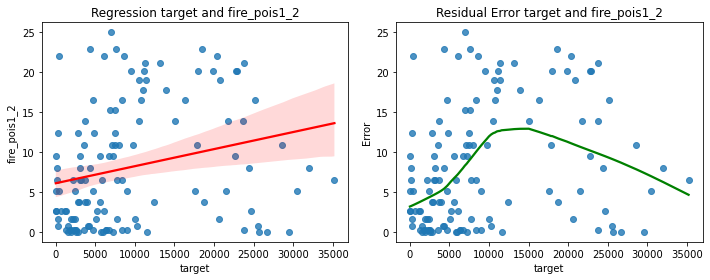

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_pois1_5
fire_pois1_5
Regression
slope:  9.221613140856854e-05
intersept:  1.3492156970595062
r2:  0.2360633392518428
P_value:  0.007543048593209099
std error:  3.395254904387902e-05


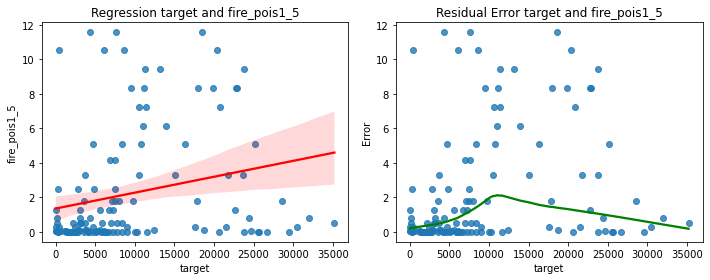

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
fire_pois1_10
fire_pois1_10
Regression
slope:  2.8028271359838652e-05
intersept:  0.25979458714223697
r2:  0.21424668190593935
P_value:  0.015575203395089438
std error:  1.142940907234794e-05


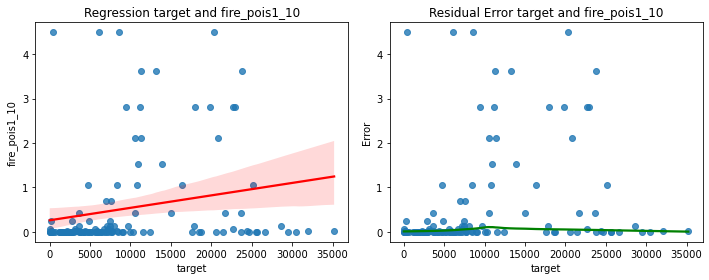

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_an_emsi_avg_si
tot_an_emsi_avg_si
Regression
slope:  -3.1508464034746355e-05
intersept:  10.589848523223047
r2:  -0.27865019874706365
P_value:  0.0015125995626999716
std error:  9.713185942500687e-06


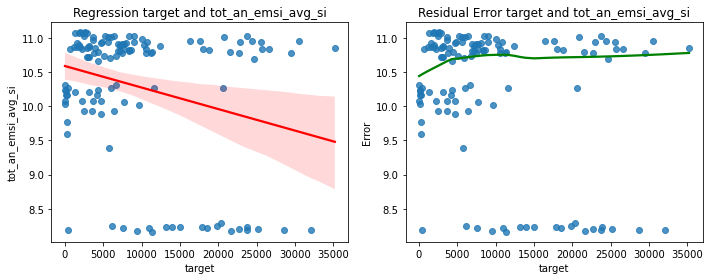

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_an_drsi_avg_si
tot_an_drsi_avg_si
Regression
slope:  -5.4121764978337985e-05
intersept:  11.79934355101878
r2:  -0.4427983552559664
P_value:  1.8598817971263383e-07
std error:  9.802118751135565e-06


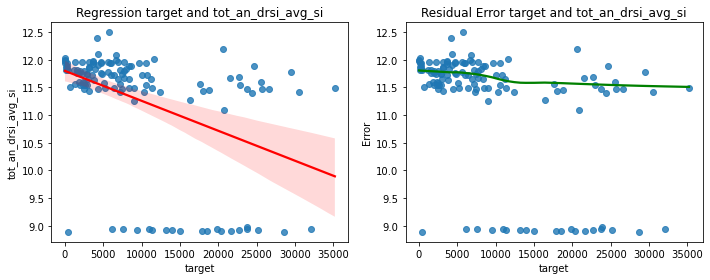

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_djf
tot_avg_emse_djf
Regression
slope:  0.0038503365875980074
intersept:  340.0198410539142
r2:  0.48003657274670986
P_value:  1.124365918234475e-08
std error:  0.0006293496365710863


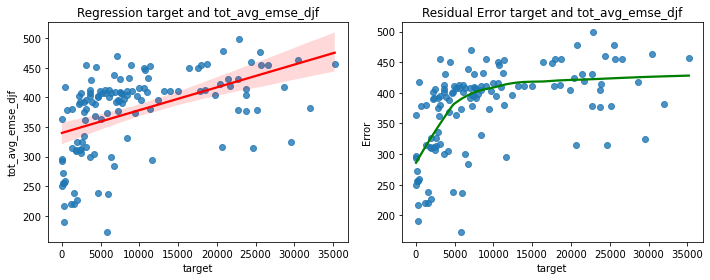

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_mam
tot_avg_emse_mam
Regression
slope:  0.0054548688625696996
intersept:  220.41695844709062
r2:  0.5885807052323804
P_value:  3.4076115643415685e-13
std error:  0.0006701472754646337


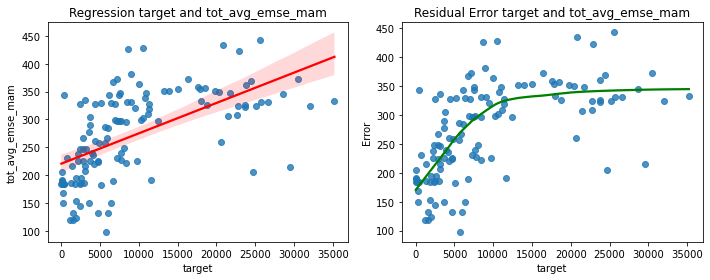

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_jja
tot_avg_emse_jja
Regression
slope:  0.005408128843083479
intersept:  74.3554224621991
r2:  0.5955424698424269
P_value:  1.5241145312206335e-13
std error:  0.0006524840991838604


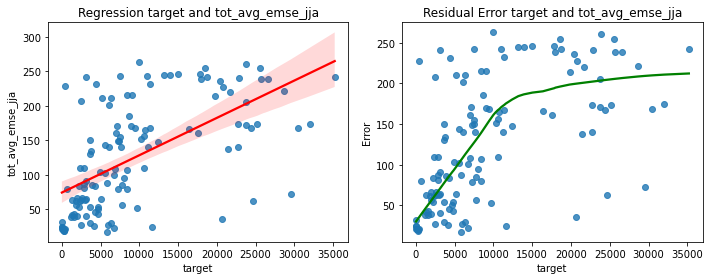

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_son
tot_avg_emse_son
Regression
slope:  0.0028137080872638965
intersept:  213.86257067076122
r2:  0.18861936995542108
P_value:  0.033693826192467226
std error:  0.001310302175193639


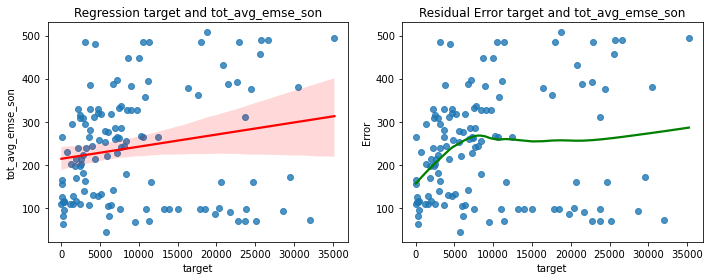

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_dry
tot_avg_emse_dry
Regression
slope:  0.009303998115778894
intersept:  159.35607060192837
r2:  0.5842849121658957
P_value:  5.545508475640315e-13
std error:  0.001155857970355177


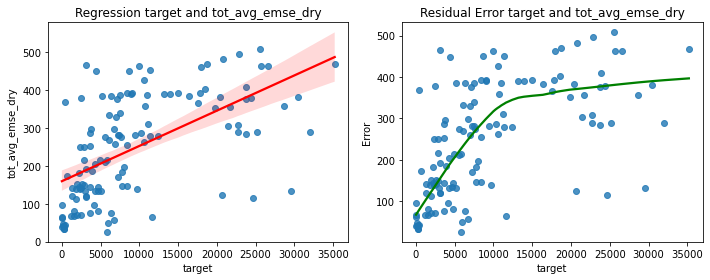

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_wet
tot_avg_emse_wet
Regression
slope:  0.005998325663429418
intersept:  686.0529361535207
r2:  0.2553267677973031
P_value:  0.003766101714355932
std error:  0.002031608182251979


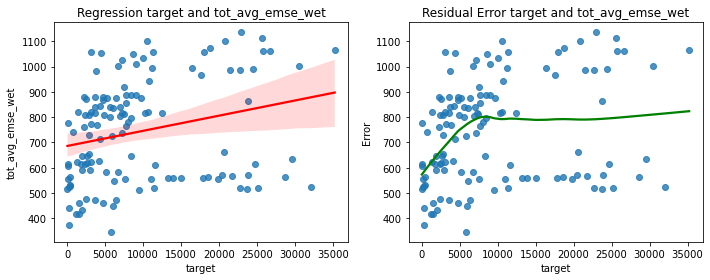

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_emse_annual
tot_avg_emse_annual
Regression
slope:  0.0153023237792083
intersept:  845.4090067554494
r2:  0.4281868392828328
P_value:  5.120728738807695e-07
std error:  0.0028886082841226056


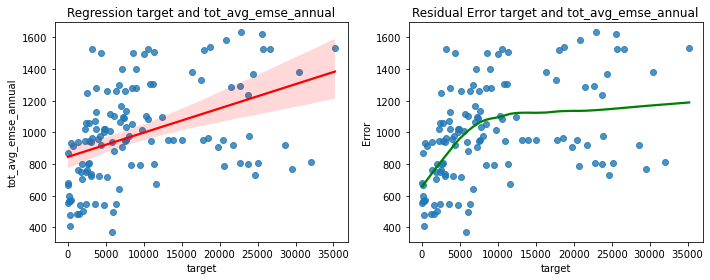

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_djf
tot_avg_drse_djf
Regression
slope:  0.018911336846880143
intersept:  375.0069115644843
r2:  0.5388630780875934
P_value:  6.34615513520542e-11
std error:  0.0026442574358475942


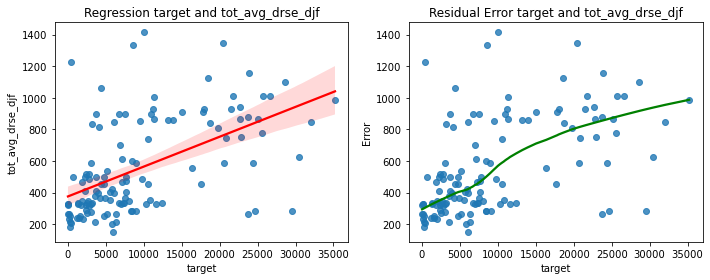

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_mam
tot_avg_drse_mam
Regression
slope:  0.005338800299633411
intersept:  229.51026891618943
r2:  0.3287701608805846
P_value:  0.00016072592486630728
std error:  0.0013716927280250147


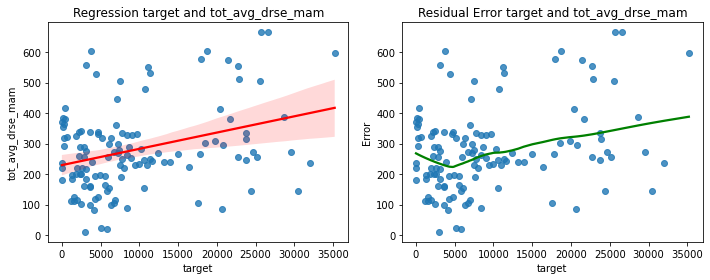

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_jja
tot_avg_drse_jja
Regression
slope:  1.2743861262136758e-05
intersept:  0.7836365562205418
r2:  0.039173694559035376
P_value:  0.6619169292159086
std error:  2.9074885301472335e-05


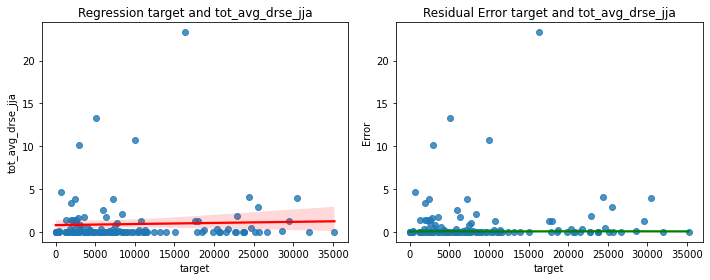

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_son
tot_avg_drse_son
Regression
slope:  0.0015660063636813747
intersept:  67.98481291088028
r2:  0.190229740293331
P_value:  0.03217855857359817
std error:  0.0007228636913632928


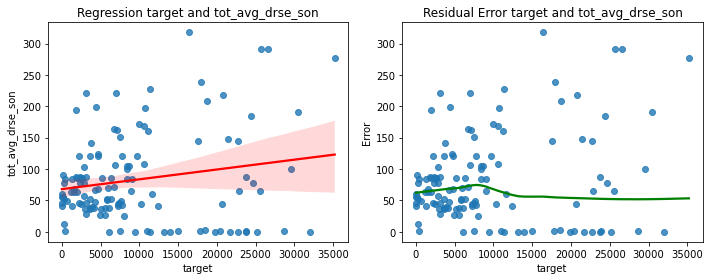

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_dry
tot_avg_drse_dry
Regression
slope:  0.0009924304510637945
intersept:  13.665045604915631
r2:  0.24135611827754602
P_value:  0.006264854411205908
std error:  0.0003569060721569271


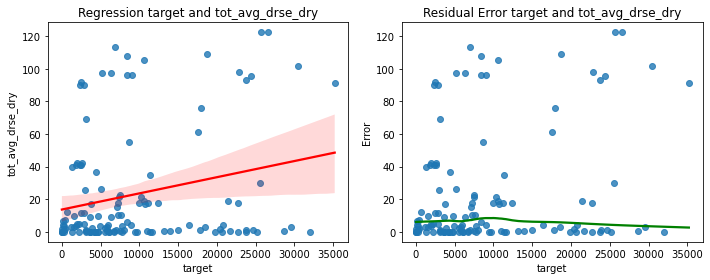

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_wet
tot_avg_drse_wet
Regression
slope:  0.018152556512872144
intersept:  641.1185216295002
r2:  0.44392272650107306
P_value:  1.7170290240089035e-07
std error:  0.0032772906643278206


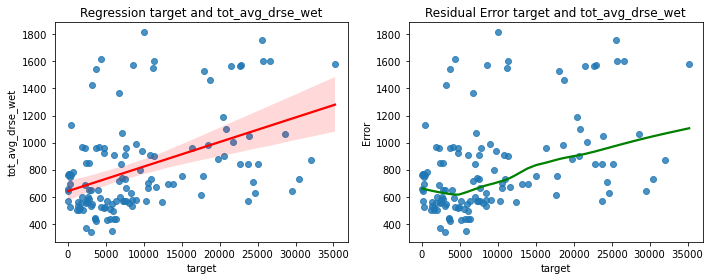

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
tot_avg_drse_annual
tot_avg_drse_annual
Regression
slope:  0.01949656780435708
intersept:  656.4245307247927
r2:  0.4593117166196975
P_value:  5.584364559677355e-08
std error:  0.00337243158360386


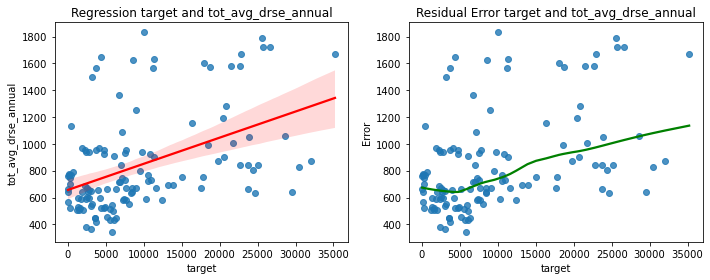

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0016444543333491524
intersept:  10.297118875051568
r2:  0.752044194170582
P_value:  2.2066982259244955e-24
std error:  0.00012890896380249209


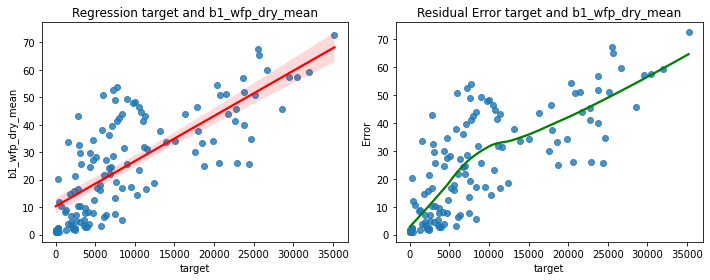

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_wfp_dry_p50
b1_wfp_dry_p50
Regression
slope:  0.0017373135901874008
intersept:  9.698402843820261
r2:  0.7467878932270818
P_value:  6.831836052222869e-24
std error:  0.0001383847589987159


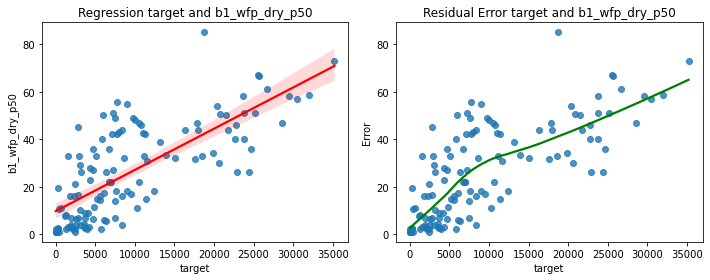

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_wfp_dry_p99
b1_wfp_dry_p99
Regression
slope:  0.0017383474880403296
intersept:  16.992107544715683
r2:  0.7217216794685761
P_value:  1.0442402459182855e-21
std error:  0.00014911900514790743


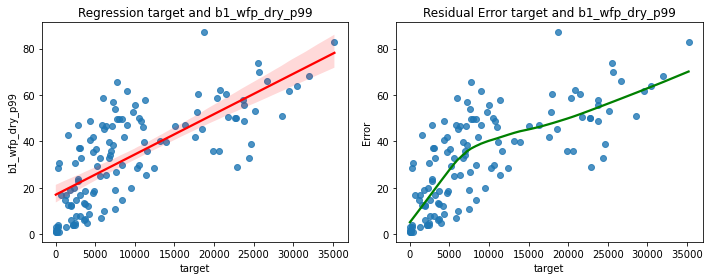

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_wdc_dry_major
b1_wdc_dry_major
Regression
slope:  6.837743733679746e-05
intersept:  1.488383836905554
r2:  0.6692736277855456
P_value:  7.900716593966256e-18
std error:  6.7897265060270405e-06


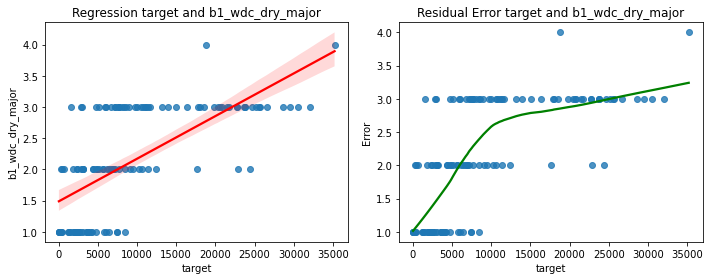

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_n17_dry_major
b1_n17_dry_major
Regression
slope:  -4.323613970952435e-05
intersept:  4.919954758696639
r2:  -0.13649818961276897
P_value:  0.12596262214678103
std error:  2.8066031869333373e-05


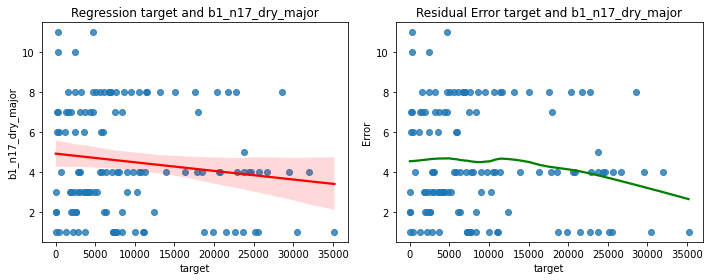

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.870329378393734e-05
intersept:  102.02657015317892
r2:  0.6670425590199286
P_value:  1.109835495903979e-17
std error:  9.860315274801422e-06


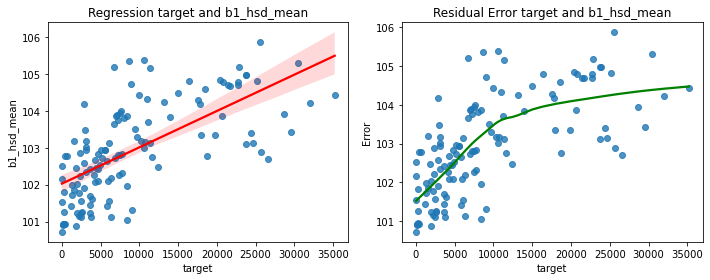

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hsd_p50
b1_hsd_p50
Regression
slope:  9.620222316783518e-05
intersept:  102.03103238762128
r2:  0.6489201023822913
P_value:  1.5801249400994051e-16
std error:  1.0088849922469091e-05


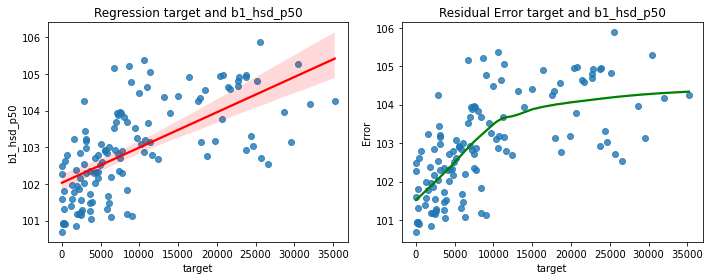

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hsd_p99
b1_hsd_p99
Regression
slope:  0.00011290477681697202
intersept:  102.54367095180488
r2:  0.6936126098782689
P_value:  1.5874330663629266e-19
std error:  1.0487761751065873e-05


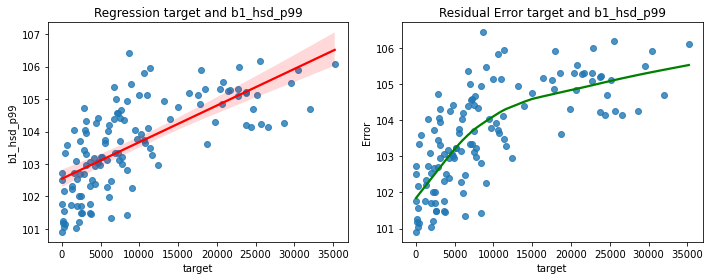

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.0002365838181454718
intersept:  103.40550469693669
r2:  0.7179916880416993
P_value:  2.106323437426439e-21
std error:  2.051408246409551e-05


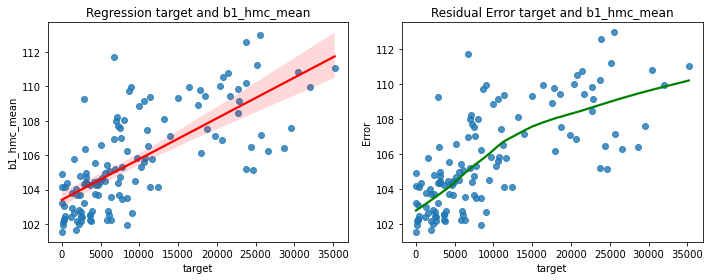

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hmc_p50
b1_hmc_p50
Regression
slope:  0.00023516163833460434
intersept:  103.39282265153219
r2:  0.7112462219646007
P_value:  7.283299502647498e-21
std error:  2.078794633273303e-05


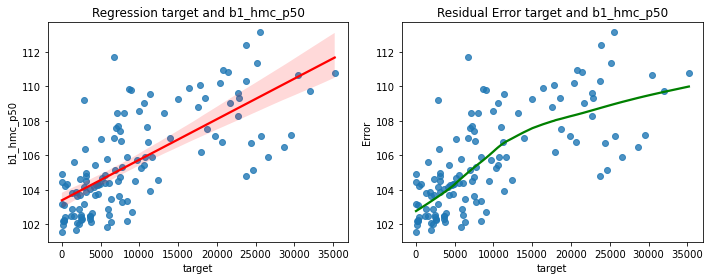

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hmc_p99
b1_hmc_p99
Regression
slope:  0.0002768774960543713
intersept:  104.37087779099528
r2:  0.7280334263468703
P_value:  3.1025060396087886e-22
std error:  2.331928160841223e-05


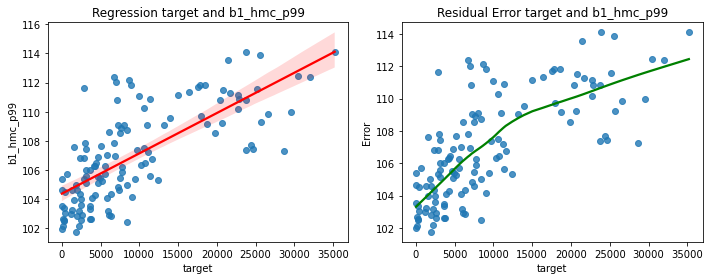

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -9.544109193054275e-05
intersept:  154.51635919095915
r2:  -0.08789363261329868
P_value:  0.32579418506805324
std error:  9.674731923327462e-05


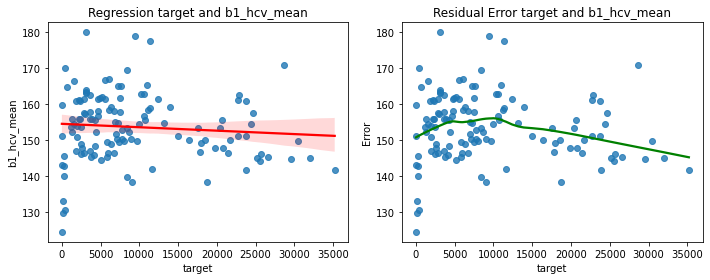

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hcv_p50
b1_hcv_p50
Regression
slope:  -8.640840253319172e-05
intersept:  154.0807101525435
r2:  -0.07744598167771957
P_value:  0.38679554803662797
std error:  9.949373530511795e-05


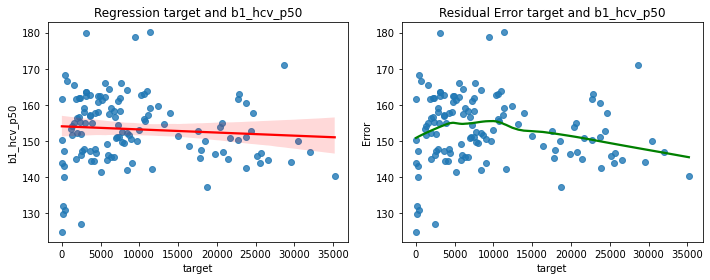

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_hcv_p99
b1_hcv_p99
Regression
slope:  -8.506076596430043e-05
intersept:  161.2671986961305
r2:  -0.07116532660019462
P_value:  0.426571814080022
std error:  0.00010663586559372074


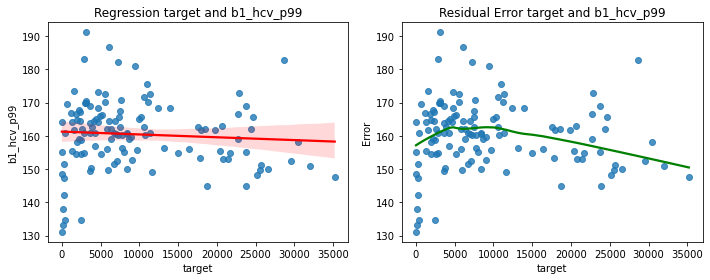

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_h99_mean
b1_h99_mean
Regression
slope:  0.0003641952576879842
intersept:  107.93768699785586
r2:  0.6859977175173246
P_value:  5.615504279366981e-19
std error:  3.4550274553965554e-05


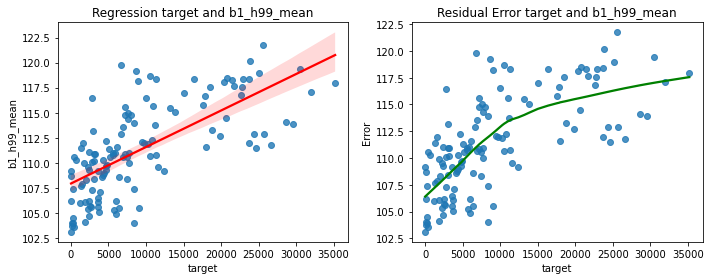

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_h99_p50
b1_h99_p50
Regression
slope:  0.0003582197238177786
intersept:  107.97543131559753
r2:  0.6712357497310855
P_value:  5.845332569862408e-18
std error:  3.538185197228248e-05


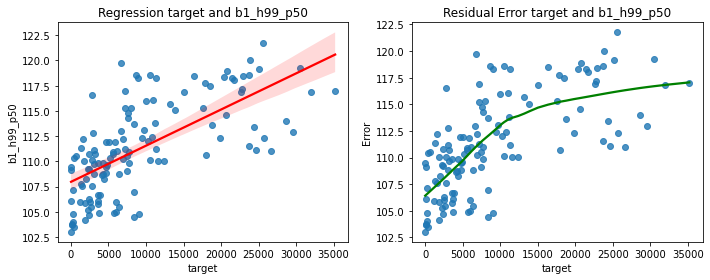

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_h99_p99
b1_h99_p99
Regression
slope:  0.00039628248063535885
intersept:  109.80656539608623
r2:  0.6938977613308244
P_value:  1.5129285056447126e-19
std error:  3.678165190380636e-05


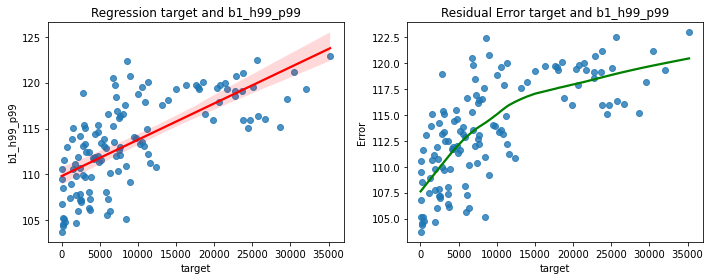

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_fdc_dry_major
b1_fdc_dry_major
Regression
slope:  5.565984244028491e-05
intersept:  1.8131607468111783
r2:  0.6295190181450205
P_value:  2.2393807340652976e-15
std error:  6.144559972381754e-06


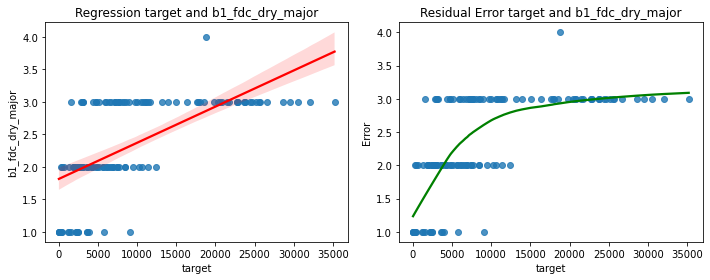

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.002294737983815046
intersept:  18.253156273188267
r2:  0.7382503560111918
P_value:  4.0411443358529556e-23
std error:  0.00018753124900853157


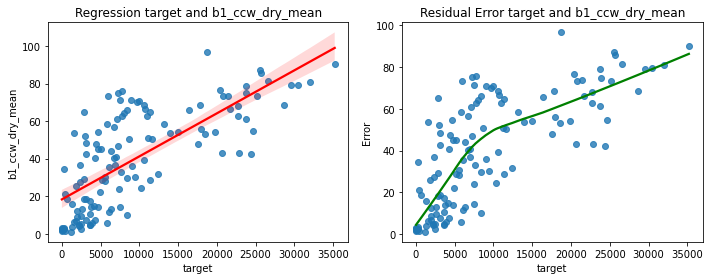

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_ccw_dry_p50
b1_ccw_dry_p50
Regression
slope:  0.0023515870163284807
intersept:  17.56115608177922
r2:  0.7356582826304412
P_value:  6.83845640798946e-23
std error:  0.00019366221036024175


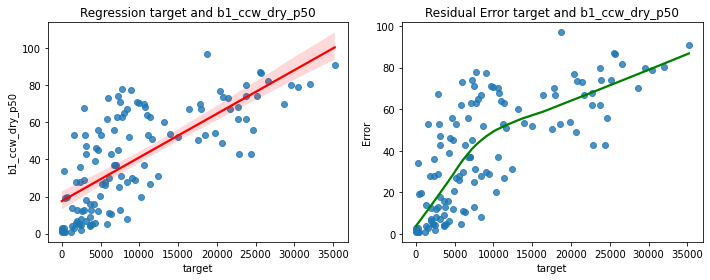

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_ccw_dry_p99
b1_ccw_dry_p99
Regression
slope:  0.0021789930283647612
intersept:  28.85412246440261
r2:  0.6948498556484223
P_value:  1.288059780926483e-19
std error:  0.00020171224724732127


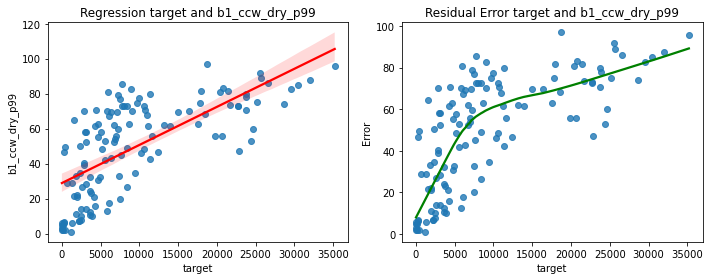

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.009629211705781867
intersept:  476.0098754231797
r2:  -0.649731898905356
P_value:  1.4082889105330904e-16
std error:  0.0010076472392466632


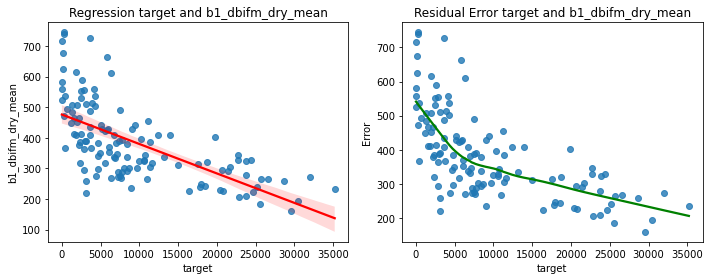

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.000413937516147582
intersept:  14.941336113943311
r2:  -0.372032569486626
P_value:  1.656528393206243e-05
std error:  9.237396626501295e-05


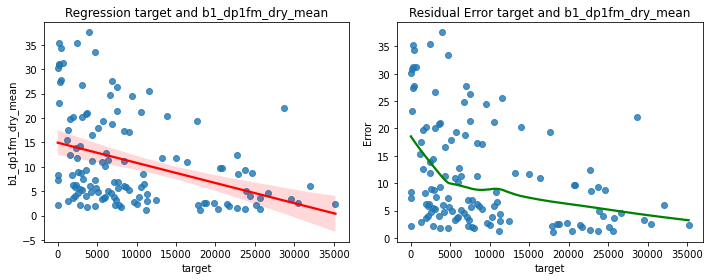

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dp1fm_dry_p50
b1_dp1fm_dry_p50
Regression
slope:  -0.0004187643612876558
intersept:  14.95702004628456
r2:  -0.3661616833419076
P_value:  2.2995648586417188e-05
std error:  9.518797913189294e-05


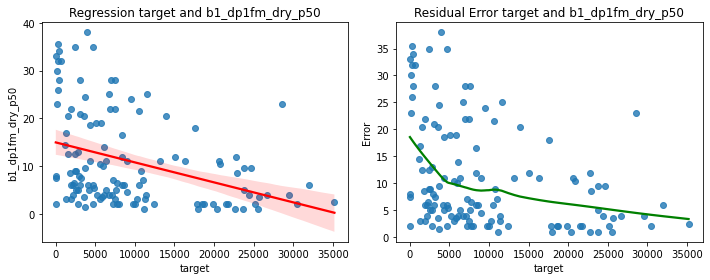

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dp1fm_dry_p99
b1_dp1fm_dry_p99
Regression
slope:  -0.0005357548177043588
intersept:  19.94060787734589
r2:  -0.40636643556179863
P_value:  2.132565349541275e-06
std error:  0.00010774613977104075


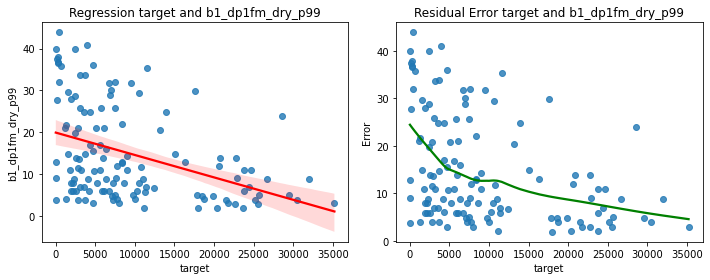

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0014188009735615098
intersept:  15.864192249211827
r2:  0.749376143674087
P_value:  3.9299442827200224e-24
std error:  0.00011212937772590017


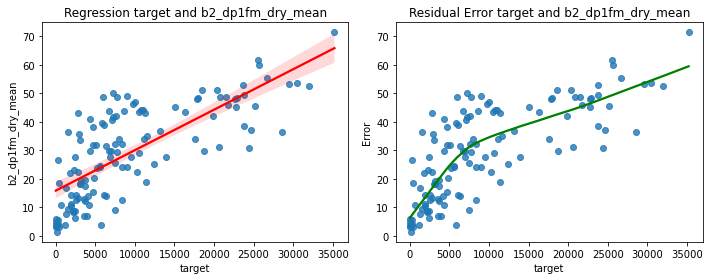

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dp1fm_dry_p50
b2_dp1fm_dry_p50
Regression
slope:  0.0014861655966832165
intersept:  15.588893436460088
r2:  0.743875482298281
P_value:  1.262733995467812e-23
std error:  0.00011942500412260951


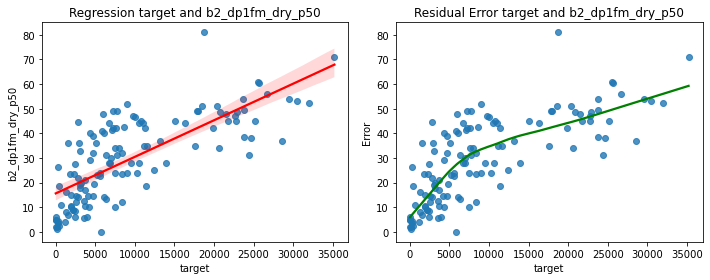

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dp1fm_dry_p95
b2_dp1fm_dry_p95
Regression
slope:  0.001420575364223919
intersept:  21.18679716035036
r2:  0.7283723073125962
P_value:  2.9039960297636425e-22
std error:  0.00011952576132937735


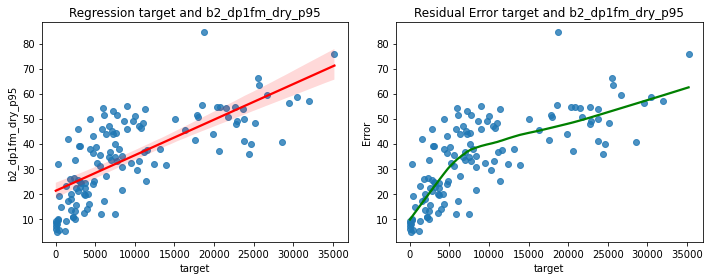

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0010592798022243546
intersept:  67.8153123839641
r2:  -0.6025890636313578
P_value:  6.617022528857736e-14
std error:  0.00012547737772316427


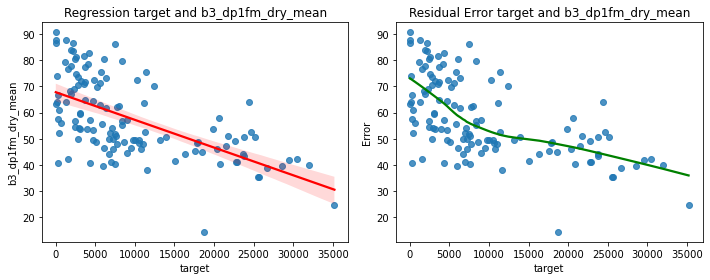

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dp1fm_dry_p50
b3_dp1fm_dry_p50
Regression
slope:  -0.0010643599326791973
intersept:  67.7718336940443
r2:  -0.5968660548152928
P_value:  1.3050545907733915e-13
std error:  0.00012797217743651396


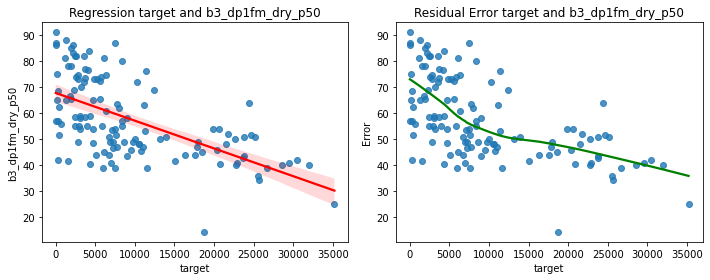

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dp1fm_dry_p99
b3_dp1fm_dry_p99
Regression
slope:  -0.001145035962213413
intersept:  74.6697832451506
r2:  -0.6288582039235082
P_value:  2.4430306600100304e-15
std error:  0.00012662602143774895


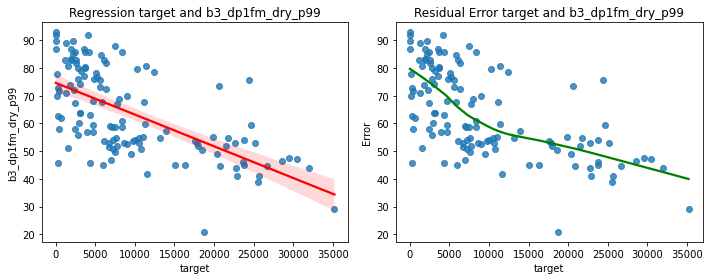

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dbifm_dry_p50
b1_dbifm_dry_p50
Regression
slope:  -0.009489087366993759
intersept:  472.5147707581527
r2:  -0.637702482280652
P_value:  7.488853762430085e-16
std error:  0.0010251832790293207


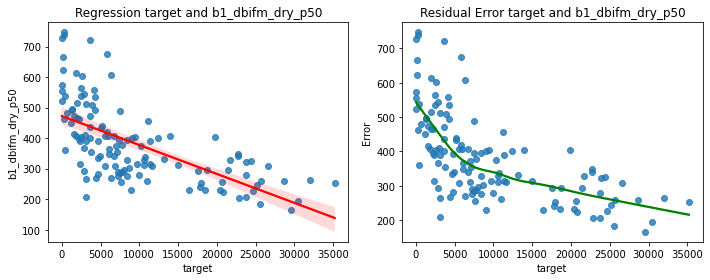

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b1_dbifm_dry_p99
b1_dbifm_dry_p99
Regression
slope:  -0.009959454464311358
intersept:  540.384819671035
r2:  -0.6257629364481492
P_value:  3.662647913755276e-15
std error:  0.0011103827717932459


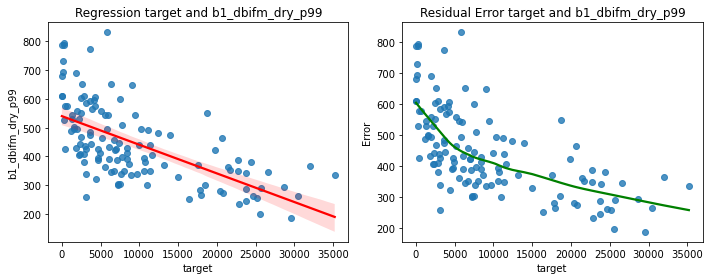

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.014707386520930616
intersept:  787.9958197546282
r2:  -0.6580373697991063
P_value:  4.249193631292427e-17
std error:  0.0015052769921797954


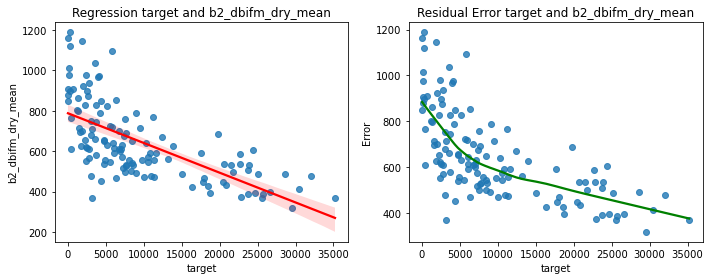

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dbifm_dry_p50
b2_dbifm_dry_p50
Regression
slope:  -0.014810715488491909
intersept:  787.7207450912282
r2:  -0.6566442328488413
P_value:  5.208764575157573e-17
std error:  0.0015215201146512505


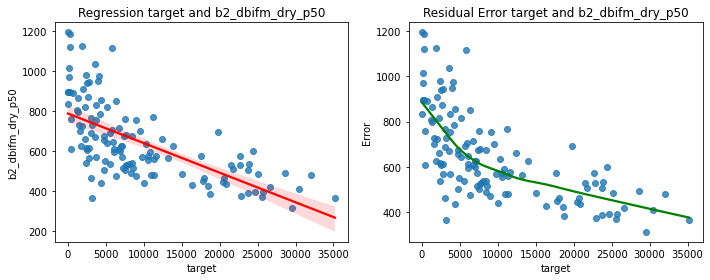

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b2_dbifm_dry_p99
b2_dbifm_dry_p99
Regression
slope:  -0.015559677558013723
intersept:  864.6769948058043
r2:  -0.652280673676508
P_value:  9.788583023229387e-17
std error:  0.0016172136623183624


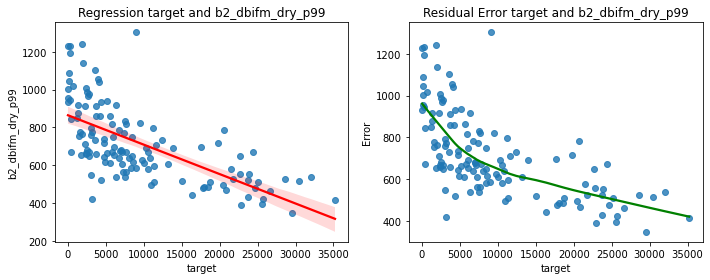

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.024627830586458163
intersept:  1135.8368783205785
r2:  -0.6672636053144723
P_value:  1.0732288662497476e-17
std error:  0.0024588158361831835


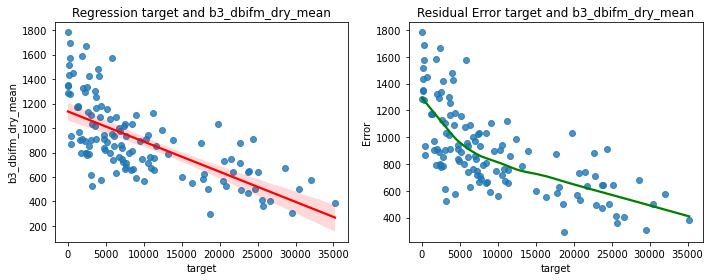

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dbifm_dry_p50
b3_dbifm_dry_p50
Regression
slope:  -0.02471062474521631
intersept:  1134.9069300392553
r2:  -0.6641755864092445
P_value:  1.7102741364058618e-17
std error:  0.0024877201107575634


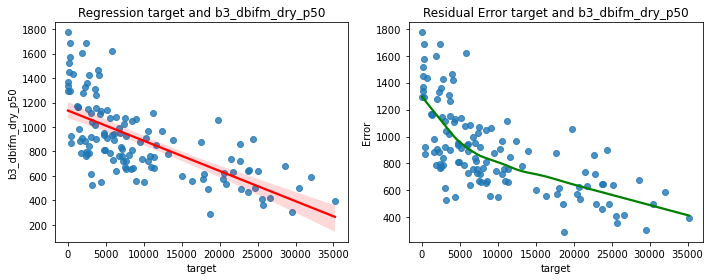

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b3_dbifm_dry_p99
b3_dbifm_dry_p99
Regression
slope:  -0.027497603209256614
intersept:  1282.8480193303456
r2:  -0.6447432713382646
P_value:  2.841672240986532e-16
std error:  0.00291590406407424


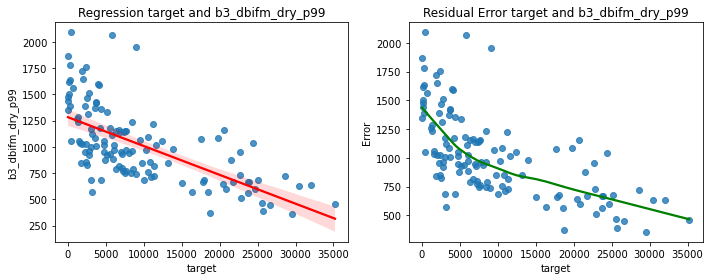

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.002253161950594011
intersept:  2085.5250739986113
r2:  -0.06275525447209318
P_value:  0.48335632002947226
std error:  0.0032050177920315247


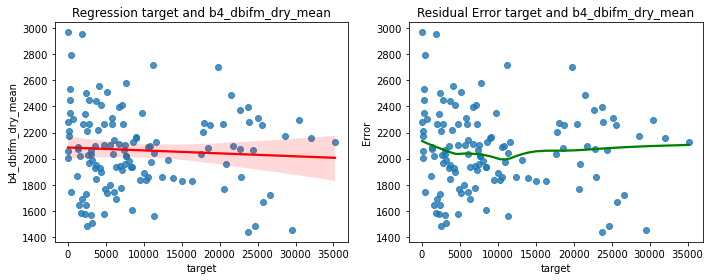

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b4_dbifm_dry_p50
b4_dbifm_dry_p50
Regression
slope:  -0.0026678695984392424
intersept:  2086.66073228953
r2:  -0.07403194095726541
P_value:  0.4081324956203516
std error:  0.00321437881730613


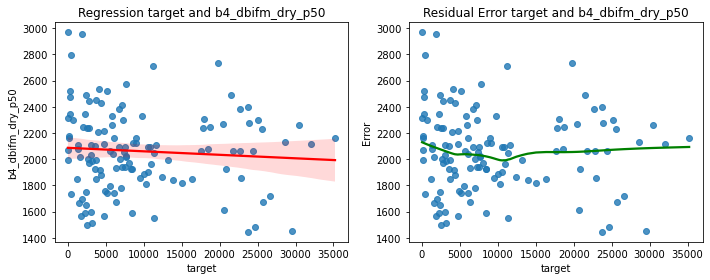

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b4_dbifm_dry_p99
b4_dbifm_dry_p99
Regression
slope:  -0.0012249841027362676
intersept:  2206.861019095616
r2:  -0.03142287472678293
P_value:  0.7258110649630654
std error:  0.003485098167111938


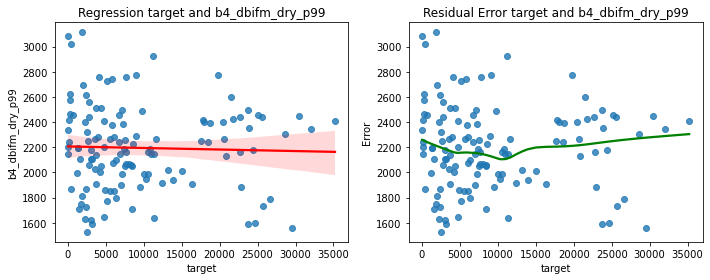

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.0412860705521756
intersept:  2726.0665574700256
r2:  -0.6868926125974298
P_value:  4.850382081253408e-19
std error:  0.003907059936513238


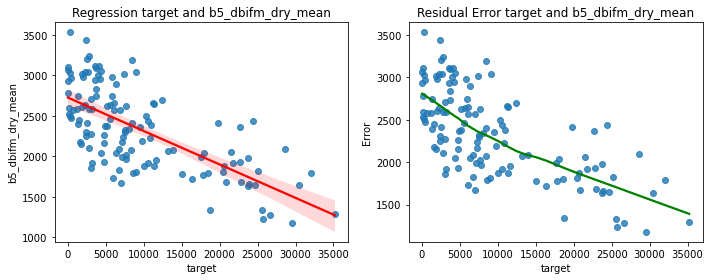

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b5_dbifm_dry_p50
b5_dbifm_dry_p50
Regression
slope:  -0.04145039119610969
intersept:  2722.648697846653
r2:  -0.6845546604676238
P_value:  7.103765553055987e-19
std error:  0.003947936031085845


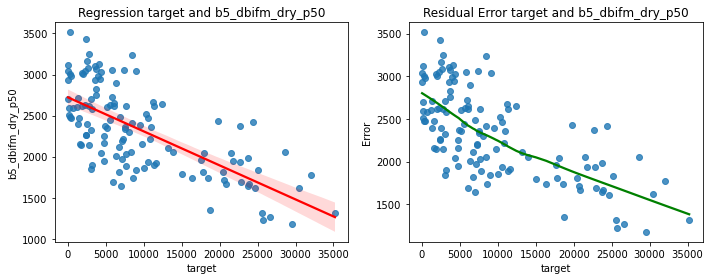

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b5_dbifm_dry_p99
b5_dbifm_dry_p99
Regression
slope:  -0.04154083299480787
intersept:  2917.894819285563
r2:  -0.6432605971782508
P_value:  3.492255856920043e-16
std error:  0.004422440577527781


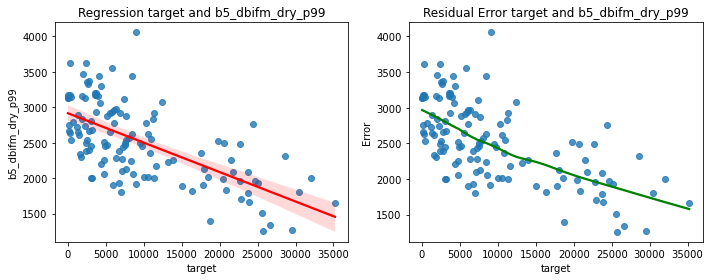

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03977356981388318
intersept:  1852.4934845304285
r2:  -0.6914107935295721
P_value:  2.2966069123322597e-19
std error:  0.003717220515143279


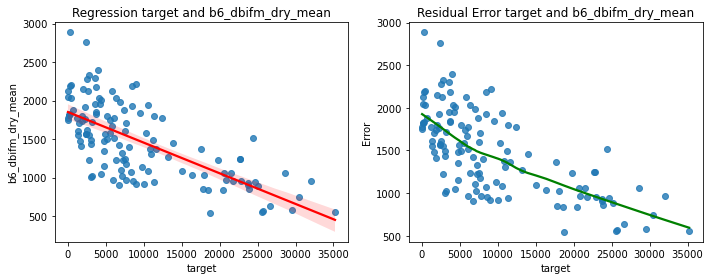

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b6_dbifm_dry_p50
b6_dbifm_dry_p50
Regression
slope:  -0.04005317129253776
intersept:  1854.0614794367418
r2:  -0.6909790275071418
P_value:  2.46814715111046e-19
std error:  0.0037478320741731463


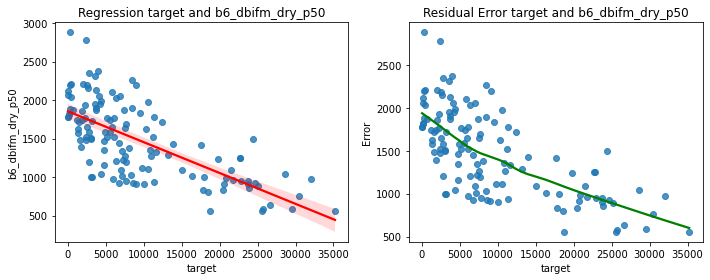

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
b6_dbifm_dry_p99
b6_dbifm_dry_p99
Regression
slope:  -0.04166437220930231
intersept:  2031.6471557052234
r2:  -0.6809955748249749
P_value:  1.2612686213688976e-18
std error:  0.0040072568953497985


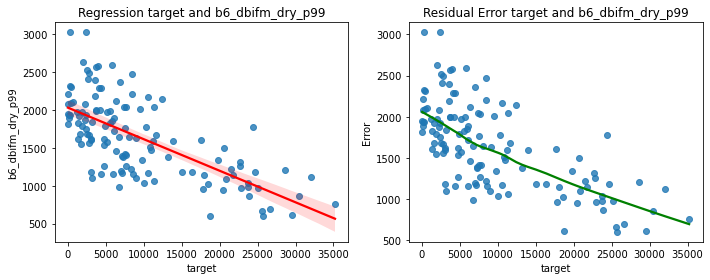

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r32
dbifmdry_r32
Regression
slope:  -71.71452899753446
intersept:  14472247.968488509
r2:  -0.4893822234646464
P_value:  5.267303186022445e-09
std error:  11.43023086383746


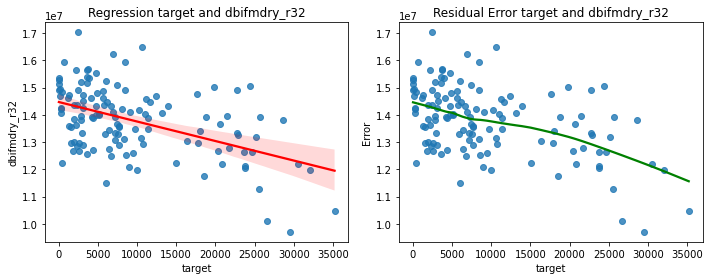

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r42
dbifmdry_r42
Regression
slope:  771.0900688090846
intersept:  26214111.34250029
r2:  0.7509549171267854
P_value:  2.7954724662663456e-24
std error:  60.64747242549095


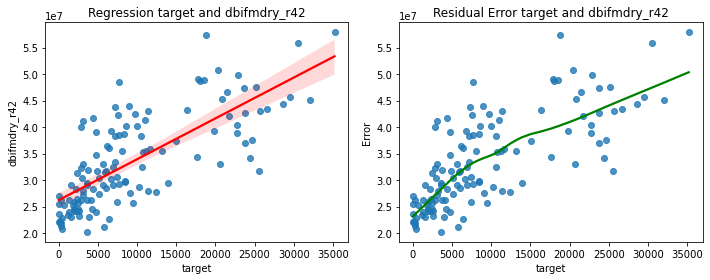

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r43
dbifmdry_r43
Regression
slope:  702.1907612032487
intersept:  18059123.151373647
r2:  0.7320592069011367
P_value:  1.4052550916243792e-22
std error:  58.44598517576615


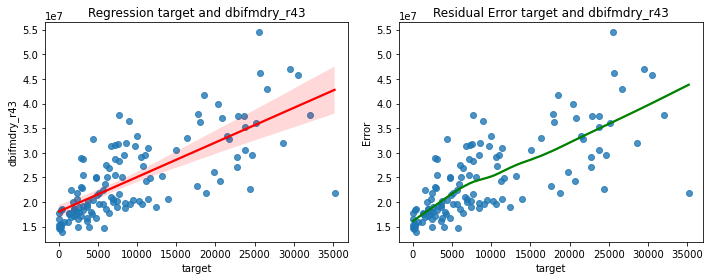

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r52
dbifmdry_r52
Regression
slope:  159.18508366966043
intersept:  35282769.70835997
r2:  0.2364607079343911
P_value:  0.007439629752385132
std error:  58.505168369220605


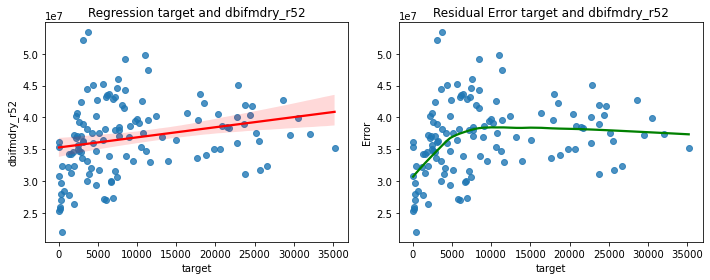

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r53
dbifmdry_r53
Regression
slope:  293.81562293738557
intersept:  24218828.129315548
r2:  0.5259783373101526
P_value:  2.1492155298673296e-10
std error:  42.49377354150606


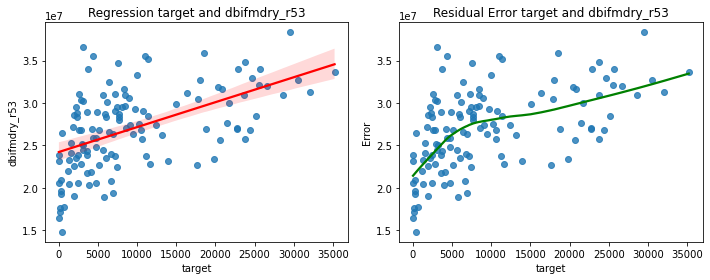

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r54
dbifmdry_r54
Regression
slope:  -191.20479459659367
intersept:  13261186.023223905
r2:  -0.6337686127730001
P_value:  1.2731001468331614e-15
std error:  20.87305896319867


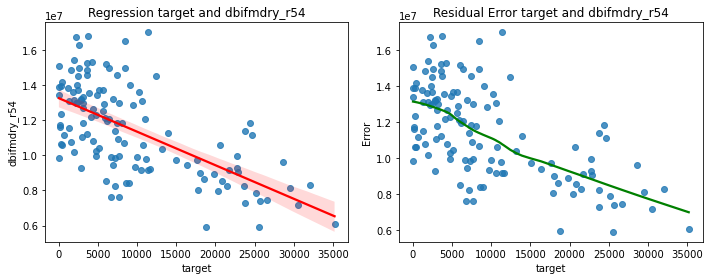

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r62
dbifmdry_r62
Regression
slope:  -145.82697354884144
intersept:  23955184.053484872
r2:  -0.28900102396294086
P_value:  0.0009832247979641876
std error:  43.20605294156292


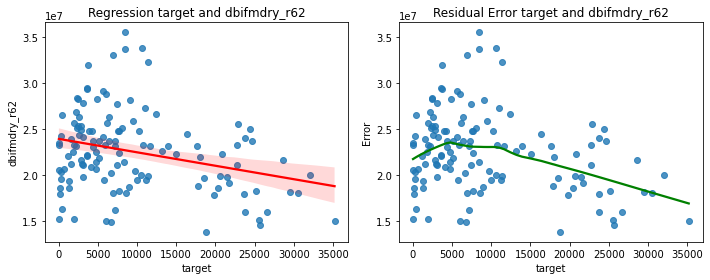

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r63
dbifmdry_r63
Regression
slope:  -6.438545705387377
intersept:  16543392.386606298
r2:  -0.020974978903934464
P_value:  0.8149348145979267
std error:  27.449579057236416


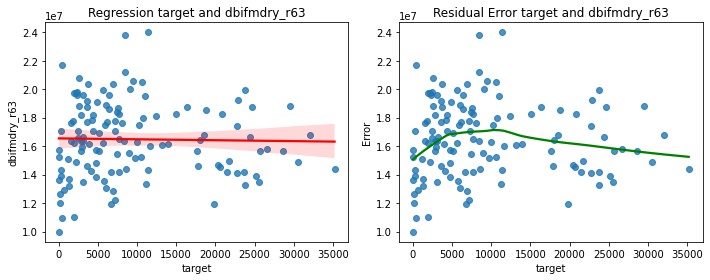

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r64
dbifmdry_r64
Regression
slope:  -185.77882363719226
intersept:  9011218.750629742
r2:  -0.6499686814308397
P_value:  1.3616937313608218e-16
std error:  19.428535878337645


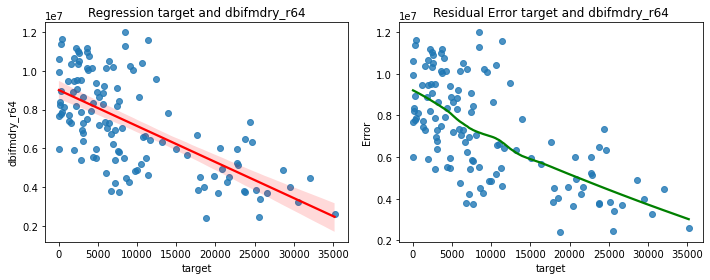

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_r65
dbifmdry_r65
Regression
slope:  -69.27484939230898
intersept:  6834125.809298463
r2:  -0.6141277711418132
P_value:  1.6133175690689298e-14
std error:  7.962557170807538


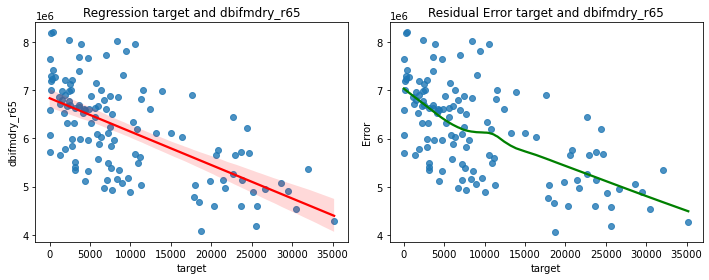

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  31.737164708288148
intersept:  2434370.3826617775
r2:  0.5718057938097663
P_value:  2.193151437300801e-12
std error:  4.072718596773828


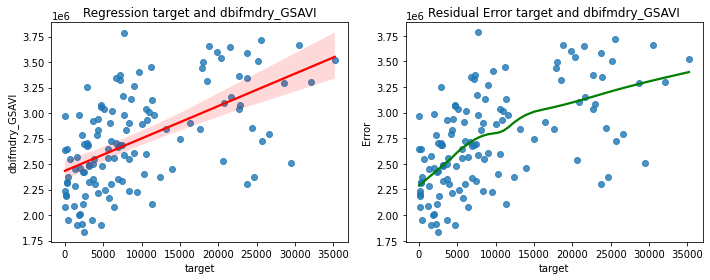

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  81.27035319938001
intersept:  4471927.619860873
r2:  0.7481498945253148
P_value:  5.1112613017993096e-24
std error:  6.446870170978285


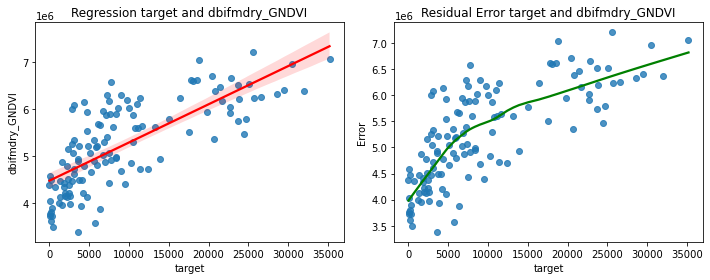

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  756.2256540004905
intersept:  38418623.510310955
r2:  0.6338972832640611
P_value:  1.2513453234137023e-15
std error:  82.52610732148102


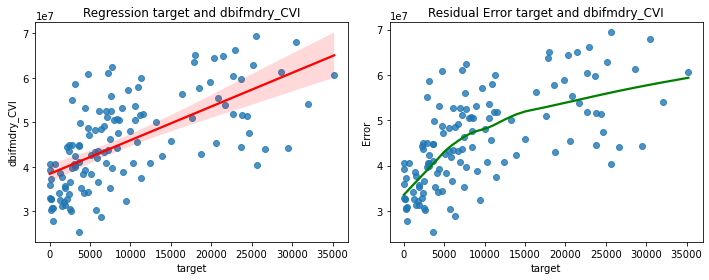

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  23.173173711928566
intersept:  -1804929.0851514805
r2:  0.4587843092734903
P_value:  5.8088757060077576e-08
std error:  4.014234005225527


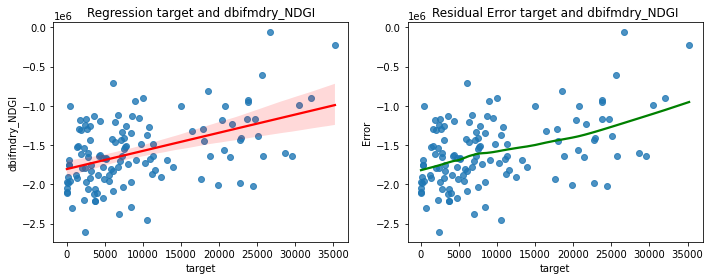

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -23.173173711928566
intersept:  1804929.0851514805
r2:  -0.4587843092734903
P_value:  5.8088757060077576e-08
std error:  4.014234005225527


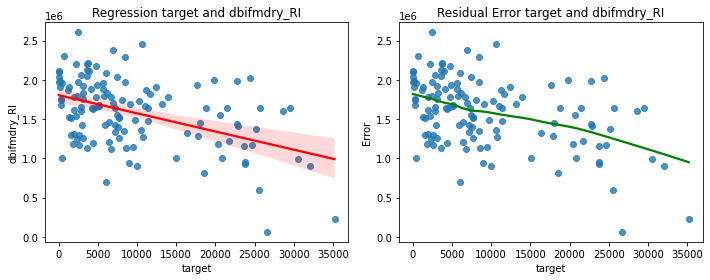

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  138.05943584249604
intersept:  527006.9296344337
r2:  0.6864037424231838
P_value:  5.254786908353262e-19
std error:  13.082708336727451


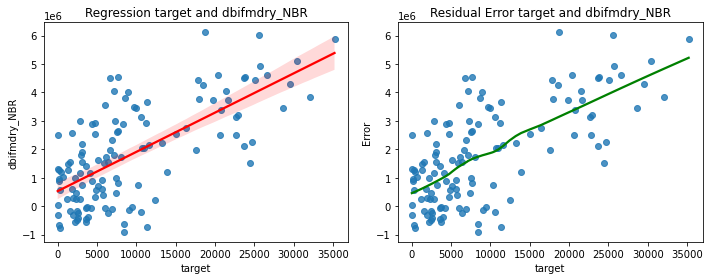

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  90.95732711360587
intersept:  -1398879.7183862412
r2:  0.6669605791147902
P_value:  1.1237188859385003e-17
std error:  9.088516576910072


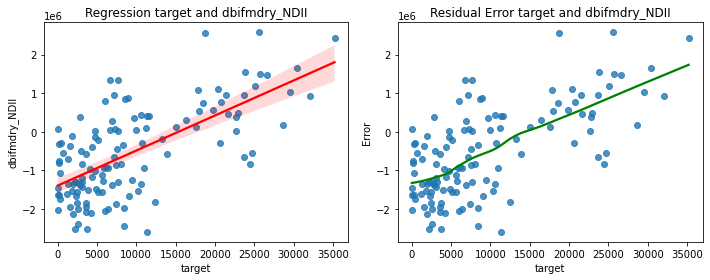

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  13.171208368199359
intersept:  1284988.2799199524
r2:  0.4171216874315434
P_value:  1.0689550920930326e-06
std error:  2.566849250943358


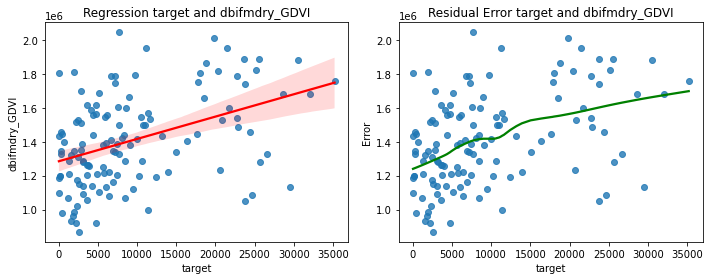

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  47.13539817704477
intersept:  1458920.2029557168
r2:  0.68705841452526
P_value:  4.720249948630178e-19
std error:  4.458566106051642


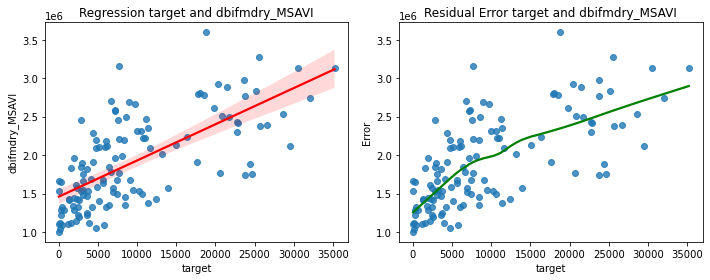

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  23.483275239273585
intersept:  930297.205567474
r2:  0.6257324421614776
P_value:  3.6772068563190506e-15
std error:  2.6183675944102287


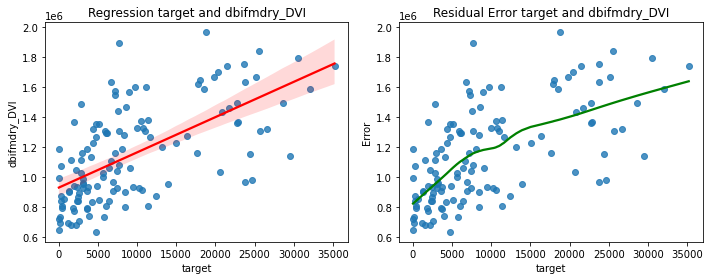

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  51.83305209486524
intersept:  1689885.2621061332
r2:  0.7038223266928038
P_value:  2.7401526560866154e-20
std error:  4.679258600846677


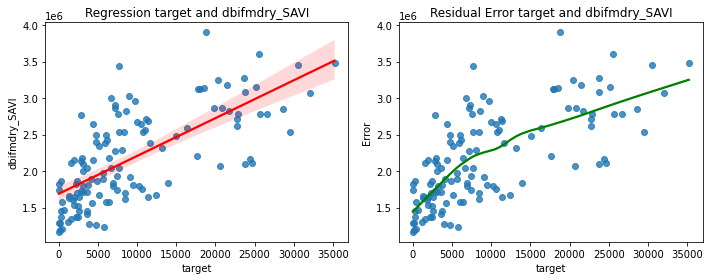

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  118.30070058289269
intersept:  2889591.1480592387
r2:  0.7674081003159263
P_value:  6.854071264749772e-26
std error:  8.840394474219762


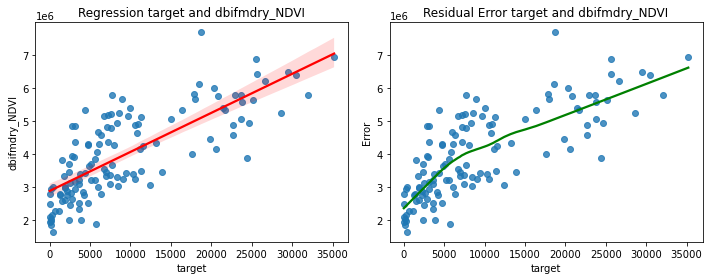

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085


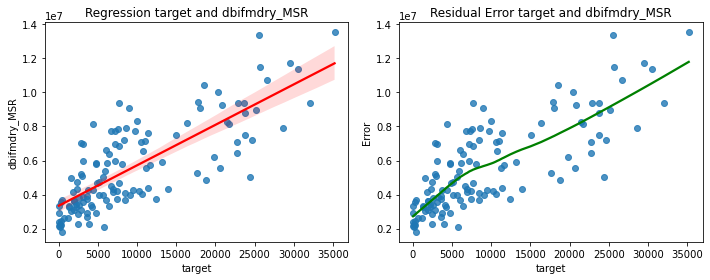

--------------------------------------------------
Residuals
slope:  237.57136144713044
intersept:  3345252.7486453378
r2:  0.785992093429702
P_value:  7.070363425196964e-28
std error:  16.71381450784085


In [69]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

In [70]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(os.path.join(output_, "{0}_{1}_ml_data.csv".format(var_, mdl)), index=False)

In [71]:
df_ml.describe()

target  fire_count  fire_min  fire_max  fire_mean  fire_sum  fire_std  \
count   127.00      127.00    127.00    127.00     127.00    127.00    127.00   
mean   9439.87       18.63      1.33      2.56       2.10     38.88      0.39   
std    8575.78        2.94      2.88      3.62       3.20     59.74      0.95   
min      18.48       16.00      0.00      0.00       0.00      0.00      0.00   
25%    2913.23       16.00      0.00      0.00       0.00      0.00      0.00   
50%    6726.41       20.00      0.00      0.00       0.00      0.00      0.00   
75%   12822.83       20.00      0.00      6.00       4.78     82.00      0.00   
max   35199.71       25.00     10.00     11.00      10.25    205.00      3.82   

       fire_med  fire_major  fire_minor  ...  dbifmdry_NDGI  dbifmdry_RI  \
count    127.00      127.00      127.00  ...         127.00       127.00   
mean       2.11        2.09        1.81  ...    -1586177.23   1586177.23   
std        3.43        3.45        3.22  ...      433162.27    433162.27   
min        0.00        0.00        0.00  ...    -2604915.00     62735.00   
25%        0.00        0.00        0.00  ...    -1903402.00   1296530.00   
50%        0.00        0.00        0.00  ...    -1641968.50   1641968.50   
75%        6.00        6.00        2.00  ...    -1296530.00   1903402.00   
max       10.00       10.00       11.00  ...      -62735.00   2604915.00   

       dbifmdry_NBR  dbifmdry_NDII  dbifmdry_GDVI  dbifmdry_MSAVI  \
count        127.00         127.00         127.00          127.00   
mean     1830270.69     -540253.96     1409322.83      1903872.45   
std      1724884.88     1169529.52      270792.43       588338.38   
min      -901894.00    -2596291.00      869000.00      1001333.00   
25%       358073.50    -1469363.00     1204000.00      1427572.00   
50%      1568159.00     -644134.00     1389000.00      1766056.00   
75%      3056175.00      322988.50     1592000.00      2337443.00   
max      6111309.00     2577320.00     2045000.00      3597595.00   

       dbifmdry_DVI  dbifmdry_SAVI  dbifmdry_NDVI  dbifmdry_MSR  
count        127.00         127.00         127.00        127.00  
mean     1151976.38     2179182.77     4006334.92    5587896.60  
std       321842.70      631564.06     1322009.57    2592086.99  
min       636000.00     1169041.00     1651739.00    1814011.00  
25%       901500.00     1671781.00     3003229.00    3632556.50  
50%      1108000.00     2101408.00     3816689.00    4849950.00  
75%      1363000.00     2680736.50     5074090.50    7355504.00  
max      1964000.00     3900953.00     7695925.00   13524145.00  

[8 rows x 106 columns]

In [72]:
# Check for null values
null_values = df_ml.isnull().sum()

In [73]:
null_values

target            0
fire_count        0
fire_min          0
fire_max          0
fire_mean         0
                 ..
dbifmdry_MSAVI    0
dbifmdry_DVI      0
dbifmdry_SAVI     0
dbifmdry_NDVI     0
dbifmdry_MSR      0
Length: 106, dtype: int64

In [74]:
df = df_ml

In [75]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df.columns:
    for value in df[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

# Model

### Split off unseen test and train data

In [95]:
#select random state
rs = 0

# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")
x_unseen, x_remaining, y_unseen, y_remaining = train_test_split(xdata1, ydata, train_size=0.20, random_state=rs) 
x_train, x_test, y_train, y_test = train_test_split(x_remaining, y_remaining, train_size=0.70, random_state=rs)  
print(x_unseen.shape, y_unseen.shape)
print("remaining.....")
print(x_remaining.shape, y_remaining.shape)
print("-"*50)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25, 105) (25,)
remaining.....
(102, 105) (102,)
--------------------------------------------------
(71, 105) (71,)
(31, 105) (31,)


### Plot up Histograms for train and test datasets

In [98]:

# Create subplots
#fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(4, 8))  # 3 rows, 1 column

# Plot data on each subplot
axs[0].hist(y_1)
axs[0].set_title('Training')
axs[0].set_xlabel('Target')
axs[0].set_ylabel('Frequency')

axs[1].hist(y_2)
axs[1].set_title('Testing')
axs[1].set_xlabel('Target')
axs[1].set_ylabel('Frequency')

axs[2].hist(ydata_un)
axs[2].set_title('Unseen')
axs[2].set_xlabel('Target')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

out = os.path.join(output_, "{0}_{1}_{2}_train_test_unseen_hist.png".format(var_, mdl, str(rs})))
#print(out)                   
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

print("saved to: ", out)

SyntaxError: invalid syntax (<ipython-input-98-a4c7fb76f6e4>, line 26)

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
#print(xdata1)

In [ ]:
print(ydata)

In [117]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np


if mdl == "rfr":

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [2, 10, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        #'min_samples_split': [2, 3, 4, 5, 10],
        #'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }
elif mdl == "gbr":
    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "abr":
    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }
else:
    print("ERROR__"*100)

# Define custom scorer for RMSE
def custom_rmse_scorer(y_true, y_pred):
    rmse = -np.sqrt(mean_squared_error(y_true, y_pred))
    #print("rmse: ", rmse)
    return rmse

# Define custom scorer for MAE
def custom_mae_scorer(y_true, y_pred):
    mae = -mean_absolute_error(y_true, y_pred)
    #print("mae: ", mae)
    return mae

# Define custom scorer for MAE
def custom_r2_scorer(y_true, y_pred):
    # Mean of true target values
    y_mean = np.mean(y_true)

    # Calculate sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    #print("ss_residual: ", ss_residual)

    # Calculate sum of squares of total
    ss_total = np.sum((y_true - y_mean) ** 2)
    #print("ss_total: ", ss_total)
    
    # Calculate R^2
    r2 = 1 - (ss_residual / ss_total)
    print("r2: ", r2)


    #r2 = r2_score(y_true, y_pred)
    #print("r2: ", r2)
    return r2

# Make it a scorer
#rmse_scorer = make_scorer(custom_rmse_scorer)
#mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)

# def custom_r2_scorer(y_true, y_pred):

#     r2 = r2_score(y_true, y_pred)
#     print("r2: ", r2)
#     return r2

# Make it a scorer
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer_ = make_scorer(custom_r2_scorer)
# -------------------------------------------------------------------

# Create GridSearchCV object with RMSE scoring
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(x_train, y_train)

# ----------------------------- RMSE ---------------------------------
print(mdl)
print("-"*100)
# Print the best score and parameters
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

# ----------------------------- MAE ---------------------------------

# Create GridSearchCV object with MAE scoring
grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(x_train, y_train)

# Print the best score and parameters
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

# ----------------------------- R2 Custom ---------------------------------

# Create GridSearchCV object with r2 scoring
grid_search_r2_ = GridSearchCV(model, param_grid, scoring=r2_scorer_, cv=5)
grid_search_r2_.fit(x_train, y_train)

# Print the best score and parameters
print("r2 Custom Best Score: ", grid_search_r2_.best_score_)
print("r2 Custom Best Parameters: ", grid_search_r2_.best_params_)

# ----------------------------- R2  ---------------------------------

# Create GridSearchCV object with r2 scoring
grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_score, cv=5)
grid_search_r2.fit(x_train, y_train)

# Print the best score and parameters
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)

rfr
----------------------------------------------------------------------------------------------------
RMSE Best Score:  -4655.339070206937
RMSE Best Parameters:  {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
MAE Best Score:  -3526.3907160175004
MAE Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
r2:  0.4310290869623107
r2:  0.362216059444168
r2:  0.3595406498724941
r2:  0.5960973773999432
r2:  0.5355618830598594
r2:  0.6144392846279174
r2:  0.4081433280045066
r2:  0.7470338907569551
r2:  0.6519714323392096
r2:  0.5094996530608932
r2:  0.5884888618808182
r2:  0.30155290437855586
r2:  0.7312558631893821
r2:  0.714676368709773
r2:  0.5471232349121291
r2:  0.5755412782821081
r2:  0.3824391534050883
r2:  0.6391368895299177
r2:  0.7729863430332247
r2:  0.626688689085448
r2:  0.5444865222208665
r2:  0.38091835462374346
r2:  0.5977651748086013
r2:  0.7296517832826421
r2:  0.6436503030212426
r2:  0.54887441

r2:  0.8004686054603934
r2:  0.8765780180215685
r2:  0.6482482609154568
r2:  0.5239741069336221
r2:  0.4644830682024592
r2:  0.7058753166518319
r2:  0.8566538461298668
r2:  0.7027079816363181
r2:  0.525137446654063
r2:  0.4581724662409481
r2:  0.8363216759487035
r2:  0.8686476891878874
r2:  0.6931824151759056
r2:  0.5357333781242483
r2:  0.48087734685390215
r2:  0.7601321543309701
r2:  0.8115100263534265
r2:  0.6803745290073802
r2:  0.5129607799822558
r2:  0.5061002222900848
r2:  0.7463968006205097
r2:  0.8588649627506318
r2:  0.6256577715593727
r2:  0.5340226893621264
r2:  0.4548359202999974
r2:  0.7257833448766899
r2:  0.8215839849597063
r2:  0.6439890388288463
r2:  0.4793446000662789
r2:  -0.16325256110417175
r2:  0.20496569061790282
r2:  0.27964921422219824
r2:  0.5775703039523017
r2:  0.6001176135006474
r2:  0.36883991621699785
r2:  0.10083560801007463
r2:  0.777265920016111
r2:  0.7412746783141553
r2:  0.5786553572445503
r2:  0.31212652310472555
r2:  0.7356105653934082
r2:  0.697

r2:  -0.1189989288856299
r2:  0.25452262140678705
r2:  0.6614888184256456
r2:  0.5872475801179113
r2:  -0.5367212770230609
r2:  0.46947752964626677
r2:  0.6126988205223743
r2:  0.5635850547487986
r2:  0.5076814845265547
r2:  0.4056501558168405
r2:  0.5446191129581691
r2:  0.8307662369834635
r2:  0.7215248975619208
r2:  0.5568025303684754
r2:  0.3583188176555051
r2:  0.6258899463388358
r2:  0.7446873458461372
r2:  0.7324473451537488
r2:  0.5169301835628249
r2:  0.49780560146776465
r2:  0.7189386185633284
r2:  0.7415919224174291
r2:  0.759450647891499
r2:  0.47759361457999616
r2:  0.5274064666406868
r2:  0.5742339465787882
r2:  0.8151168895091526
r2:  0.711060461635569
r2:  0.5028224450180099
r2:  0.405253588051819
r2:  0.612076207724082
r2:  0.8179315130231805
r2:  0.7212994530919448
r2:  0.5326849093390285
r2:  0.42419864922782113
r2:  0.690976714109544
r2:  0.793750740936339
r2:  0.6672917389596567
r2:  0.5138957273924833
r2:  0.45275068479564107
r2:  0.6541700902757022
r2:  0.7922609

r2:  0.6580539943011882
r2:  0.5811655583293148
r2:  -0.15967749123750297
r2:  -0.14814672318520583
r2:  0.2686664116630749
r2:  0.6595467205820645
r2:  0.5836706312621265
r2:  -0.19697003447644312
r2:  -0.1418931576404585
r2:  0.29280855647071946
r2:  0.6430475654908249
r2:  0.5944230248890416
r2:  -0.17574421664324968
r2:  -0.14416168425402875
r2:  0.2610494954452297
r2:  0.6574623239972981
r2:  0.5900133419463389
r2:  -0.1876666555798867
r2:  -0.14364617130231006
r2:  0.26438566701424804
r2:  0.653904189164592
r2:  0.4470197899404982
r2:  0.46471538561258396
r2:  0.7792704978349807
r2:  0.37658834499777893
r2:  0.4897343486811089
r2:  0.5462379326067024
r2:  0.42600982129766185
r2:  0.41271533907174796
r2:  0.6782709190604261
r2:  0.750646380019594
r2:  0.5030262611898617
r2:  0.4051966275601049
r2:  0.6331021209208583
r2:  0.8101386474227674
r2:  0.6861029330487018
r2:  0.5754697595877498
r2:  0.42729135222199155
r2:  0.7214883344394338
r2:  0.8161701030269243
r2:  0.67819845011622

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

r2 Best Score:  nan
r2 Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 2}


C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional arguments but 3 were given

  UserWarning,
C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: r2_score() takes 2 positional

In [118]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_rmse.best_estimator_
fac = "RMSE"
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)
print(best_rf)

RMSE Best Score:  -4655.339070206937
RMSE Best Parameters:  {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=50)


In [119]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_mae.best_estimator_
fac = "MAE"
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)
print(best_rf)

MAE Best Score:  -3526.3907160175004
MAE Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      n_estimators=30)


In [120]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

print("r2 Best Custom Score: ", grid_search_r2_.best_score_)
print("r2 Best Custom Parameters: ", grid_search_r2_.best_params_)
print(best_rf)

r2 Best Custom Score:  0.6876969333591605
r2 Best Custom Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 40}
RandomForestRegressor(n_estimators=2)


In [121]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)
print(best_rf)

r2 Best Score:  nan
r2 Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 2}
RandomForestRegressor(n_estimators=2)


In [115]:
print(grid_search_mae.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=50)


In [ ]:
Manual best_rf = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=150)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(x_train, y_train)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]

r2 = round(rfrLCHM.score(x_train, y_train),2)
mse = round(np.mean((y_train - rfrLCHM.predict(x_train))**2), 2)
rmse = round(np.sqrt(np.mean((y_train - rfrLCHM.predict(x_train))**2)), 2)
              

plt.scatter(rfrLCHM.predict(x_train), y_train,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)

plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
plt.title(f'Training data: {var_} - {mdl}')

# 1 for 1 line

plt.plot(x, y, color = 'r')

# Add text to the plot
plt.text(500, 28000, f'r2: {r2}', fontsize=10, color='black')
plt.text(500, 26500, f'MSE: {mse}', fontsize=10, color='black')
plt.text(500, 25000, f'RMSE: {rmse}', fontsize=10, color='black')
plt.text(500, 23500, f'n: {len(y_1)}', fontsize=10, color='black')



out = os.path.join(output_, "{0}_{1}_{2}_{3}_train.pdf".format(var_, mdl, fac, str(rs)))
#print(out)                   
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

print("saved to: ", out)

In [ ]:
y2_predict = rfrLCHM.predict(x_test)

r2 = round(rfrLCHM.score(x_test, y_test),2)
mse = round(np.mean((y_test - rfrLCHM.predict(x_test))** 2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_test) ** 2)), 2)
bias = round(np.mean(y_test) - np.mean(y2_predict), 2)
var = round(explained_variance_score(y_test, y2_predict), 2)

plt.scatter(y2_predict, y_test)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
plt.title(f'Testing data: {mdl}')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Add text to the plot
plt.text(500, 28000, f'r2: {r2}', fontsize=10, color='black')
plt.text(500, 26500, f'MSE: {mse}', fontsize=10, color='black')
plt.text(500, 25000, f'RMSE: {rmse}', fontsize=10, color='black')
plt.text(500, 23500, f'Bias: {bias}', fontsize=10, color='black')
plt.text(500, 22000, f'Exp var: {var}', fontsize=10, color='black')
plt.text(500, 22000, f'n: {len(y_1)}', fontsize=10, color='black')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_test_data.pdf".format(var_, mdl, fac, str(rs)))), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
fiResult = np.array(fiResult)
score = (fiResult[:,0])
arr_unicode =score
# Convert Unicode strings to float values
arr_float = arr_unicode.astype(np.float)

# Round float values to two decimal places
score_4 = np.around(arr_float, decimals=4)

band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score_4))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance') #, rotation=45)
ax.set_ylabel('Ranked variables') #, rotation=45)
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# Adjust layout
plt.tight_layout()
# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot

out = os.path.join(output_, "{0}_{1}_{2}_Band_Importance_Score.pdf".format(var_, fac, mdl))
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()
print(out)

### Predict the selected model on the test data

In [ ]:
df_band.info()

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
#Plot has value at the top with very small n value 

In [ ]:
#Plot has value at the top with very small n value

sel_num = 10
df_var = dfsort.head(sel_num)

In [ ]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
column_var

In [ ]:
model_data

In [ ]:
select_df = model_data[column_var]

In [ ]:
df_corr = select_df.corr()
df_corr

In [ ]:
dfsort.to_csv(os.path.join(output_, "{0}_{1}_{2}_variable_score.csv".format(var_, fac, mdl)))
df_corr.to_csv(os.path.join(output_, "{0}_{1}_{2}_select_variable_corrolation.csv".format(var_, fac, mdl)))

In [ ]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_variable_score.png".format(var_, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
select_df

# Rerun on Selected data

In [ ]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
select_df

## Re-train model on selected paramiters

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))

r2 = round(rfrLCHM.score(X_1, y_1),2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))** 2), 2)
rmse = round(np.sqrt(np.mean((y_1 - rfrLCHM.predict(X_1))** 2)), 2)
#bias = round(np.mean(y_2) - np.mean(y2_predict), 2)


plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1,30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')
plt.title(f'Training selected {str(sel_num)} data: {var_} - {mdl}')

# Add text to the plot
plt.text(500, 28000, f'r2: {r2}', fontsize=10, color='black')
plt.text(500, 26500, f'MSE: {mse}', fontsize=10, color='black')
plt.text(500, 25000, f'RMSE: {rmse}', fontsize=10, color='black')
#plt.text(500, 23500, f'Bias: {bias}', fontsize=10, color='black')
plt.text(500, 23500, f'n: {len(y_1)}', fontsize=10, color='black')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_sel{3}_train.pdf".format(var_, fac, mdl, sel_num)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

arr_unicode =score
# Convert Unicode strings to float values
arr_float = arr_unicode.astype(np.float)

# Round float values to two decimal places
score_4 = np.around(arr_float, decimals=4)

band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score_4))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.tight_layout()

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
out = os.path.join(output_, "{0}_{1}_{2}_select_{3}_Band_Importance_Score.pdf".format(var_, fac, mdl, str(sel_num)))
plt.savefig(out, dpi=300)  # dpi sets the resolution in dots per inch
plt.show()
print("plot: ", out)

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

r2 = round(rfrLCHM.score(X_2, y_2),2)
mse = round(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)
var = round(explained_variance_score(y_2, y2_predict), 2)

plt.scatter(y2_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
plt.title(f'Testing selected {str(sel_num)} data: {var_} - {mdl}')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Add text to the plot
plt.text(500, 28000, f'r2: {r2}', fontsize=10, color='black')
plt.text(500, 26500, f'MSE: {mse}', fontsize=10, color='black')
plt.text(500, 25000, f'RMSE: {rmse}', fontsize=10, color='black')
plt.text(500, 23500, f'Bias: {bias}', fontsize=10, color='black')
plt.text(500, 22000, f'Exp var: {var}', fontsize=10, color='black')
plt.text(500, 20500, f'n: {len(y_1)}', fontsize=10, color='black')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_sel{3}_test.pdf".format(var_, fac, mdl, sel_num)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open("{0}_{1}_{2}_sel_{3}_model".format(var_, fac, mdl, sel_num), 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

In [ ]:
c_list = unseen_data.columns.tolist()
c_list

In [ ]:
df = unseen_data[column_var]

In [ ]:
df

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
# dfx = df1[:1]
# dfy = df1[1:]

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
list(df1.columns)

In [ ]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [ ]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [ ]:
xdata1.shape

In [ ]:
ydata.shape

In [ ]:
with open("{0}_{1}_{2}_sel_{3}_model".format(var_, fac, mdl, sel_num), 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)


r2 = round(rf.score(xdata2, ydata),2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)
var = round(explained_variance_score(ydata, predicted), 2)


# plot up predicted and observed data 
plt.scatter(predicted, ydata) #,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1, 30000)
plt.ylim(-1, 30000)

# Add text to the plot
plt.text(500, 28000, f'r2: {r2}', fontsize=10, color='black')
plt.text(500, 26500, f'MSE: {mse}', fontsize=10, color='black')
plt.text(500, 25000, f'RMSE: {rmse}', fontsize=10, color='black')
plt.text(500, 23500, f'Bias: {bias}', fontsize=10, color='black')
plt.text(500, 22000, f'Exp var: {var}', fontsize=10, color='black')
plt.text(500, 20500, f'n: {len(y_1)}', fontsize=10, color='black')

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_sel_{3}_data.png".format(var_, fac, mdl, str(sel_num)),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open("{0}_{1}_{2}_{3}_sel_data".format(var_, d_type, fac, mdl)', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()